In [1]:
import gempyor # incidCshift_delta_R13
from gempyor import seir, config
import numpy as np
config_filepath = "config_FCH_R15_lateBoo_noVar_ContRes_blk5_fch_Aug28_pertBA45_ts_test.yml"

gempyor_simulator = gempyor.InferenceSimulator(
    config_path=config_filepath,
    run_id="2022.06.21.14:47:23.UTC",
    prefix="USA/inference/med/2022.06.21.14:47:23.UTC/global/intermediate/000000001.",
    first_sim_index=1,
    scenario="inference",  # NPIs scenario to use
    deathrate="med",  # Outcome scenario to use
    stoch_traj_flag=False,
    spatial_path_prefix="./",  # prefix where to find the folder indicated in spatial_setup$
)
config.clear()
config.read(user=False)
config.set_file(config_filepath)

gempyor_simulator.get_outcome_npi()

  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: 2022.06.21.14:47:23.UTC,
  gempyor >> prefix: USA/inference/med/2022.06.21.14:47:23.UTC/global/intermediate/000000001.;


INFO:root:[Outcomes.NPI] completed in 0.27 s


In [2]:
#gempyor_simulator.one_simulation(sim_id2write=0)

## From Integration Dump

In [2]:
import gempyor # incidCshift_delta_R13
from gempyor import seir, config
import pickle
with open('integration_dump.pkl','rb') as fn_dump:
    states, states_daily_incid, ncompartments, nspatial_nodes, ndays, parameters, dt, transitions, proportion_info,  transition_sum_compartments, initial_conditions, seeding_data, seeding_amounts, mobility_data, mobility_row_indices, mobility_data_indices, population,  stochastic_p,  method = pickle.load(fn_dump)


fnct_args = {
    "ncompartments": ncompartments,
    "nspatial_nodes": nspatial_nodes,
    "ndays": ndays,
    "parameters": parameters,
    "dt": dt,
    "transitions": transitions,
    "proportion_info": proportion_info,
    "transition_sum_compartments": transition_sum_compartments,
    "initial_conditions": initial_conditions,
    "seeding_data": seeding_data,
    "seeding_amounts": seeding_amounts,
    "mobility_data": mobility_data,
    "mobility_row_indices": mobility_row_indices,
    "mobility_data_indices": mobility_data_indices,
    "population": population,
    "stochastic_p": stochastic_p,
}

states_raw = gempyor.steps_rk4.rk4_integration(
**fnct_args
)

states, states_daily_incid = states_raw

221it [00:39,  5.66it/s]


In [4]:
parameters.shape

(57, 441, 51)

In [4]:
error = False
## Perform some checks:
if np.isnan(states_daily_incid).any() or np.isnan(states).any():
    print(
        "Integration error: NaN detected in epidemic integration result. Failing..."
    )
    error = True
if not (np.isfinite(states_daily_incid).all() and np.isfinite(states).all()):
    print(
        "Integration error: Inf detected in epidemic integration result. Failing..."
    )
    error = True
if (states_daily_incid < 0).any() or (states < 0).any():
    print(
        "Integration error: negative values detected in epidemic integration result. Failing..."
    )
    # todo: this, but smart so it doesn't fail if empty array
    # print(
    #    f"STATES: NNZ:{states[states < 0].size}/{states.size}, max:{np.max(states[states < 0])}, min:{np.min(states[states < 0])}, mean:{np.mean(states[states < 0])} median:{np.median(states[states < 0])}"
    # )
    # print(
    #    f"STATES_incid: NNZ:{states_daily_incid[states_daily_incid < 0].size}/{states_daily_incid.size}, max:{np.max(states_daily_incid[states_daily_incid < 0])}, min:{np.min(states_daily_incid[states_daily_incid < 0])}, mean:#{np.mean(states_daily_incid[states_daily_incid < 0])} median:{np.median(states_daily_incid[states_daily_incid < 0])}"
    # )
    error = True
error

False

In [ ]:
out_df = gempyor.seir.states2Df(gempyor_simulator.s,  states_raw)
e_new = out_df[(out_df['mc_value_type'] == 'incidence') & (out_df['mc_infection_stage'] == 'E')]
e_new = e_new.reset_index(drop=True).groupby('date').sum()

In [ ]:

print(
    f"STATES: NNZ:{states[states < 0].size}/{states.size}, max:{np.max(states[states < 0])}, min:{np.min(states[states < 0])}, mean:{np.mean(states[states < 0])} median:{np.median(states[states < 0])}"
)
print(
    f"STATES_incid: NNZ:{states_daily_incid[states_daily_incid < 0].size}/{states_daily_incid.size}, max:{np.max(states_daily_incid[states_daily_incid < 0])}, min:{np.min(states_daily_incid[states_daily_incid < 0])}, mean:{np.mean(states_daily_incid[states_daily_incid < 0])} median:{np.median(states_daily_incid[states_daily_incid < 0])}"
)

In [ ]:
# it's nan maybe ?
print(np.isnan(states).sum() / states.size)
print(states[states < 0].size / states.size)

In [ ]:

print(np.isnan(states_daily_incid).sum() / states_daily_incid.size)
print(states[states_daily_incid < 0].size / states_daily_incid.size)
np.isfinite(states_daily_incid).all()

In [ ]:
states.shape # n_days, n_compartments, n_spatial nodes

In [ ]:
np.nonzero(np.isnan(states))

In [ ]:
states[41,0,0]33

In [2]:
setup= gempyor_simulator.s
sim_id=0
seeding = pd.read_csv(
                setup.get_input_filename(
                    ftype=setup.seeding_config["seeding_file_type"],
                    sim_id=sim_id,
                    extension_override="csv",
                ),
                converters={"place": lambda x: str(x)},
                parse_dates=["date"],
            )
amounts = seeding["amount"]
seeding = seeding.sort_values(by="date", axis="index").reset_index()
amounts

NameError: name 'pd' is not defined

In [ ]:
seeding_dict, seeding_amounts = gempyor.seeding_ic._DataFrame2NumbaDict(df=seeding, amounts=amounts, setup=setup)

In [ ]:
seeding_amounts

In [ ]:
gempyor_simulator.s.seedingAndIC.draw_seeding(0, setup= gempyor_simulator.s)

In [ ]:
seeding_data

In [ ]:
gempyor_simulator.plot_transition_graph(output_file="full_graph")

In [ ]:
gempyor_simulator.plot_transition_graph(
    output_file="readable_graph",
    source_filters=[["age0to17"], ["OMICRON", "WILD"]],
    destination_filters=[["OMICRON", "WILD"]],
)

In [ ]:
comp_to_plot = "I1" #["S", "E", "I1", "I2", "I3", "R", "W"] 
vt= 'incidence'
all_S = out_df[(out_df['mc_value_type'] == vt) & (out_df['mc_infection_stage'] == comp_to_plot)].reset_index(drop=True).groupby('date').sum()
import matplotlib.pyplot as plt
import datetime


fig, ax = plt.subplots(1,1, figsize=(16,7))
ax.plot(all_S)
ax.grid()

fig, ax = plt.subplots(1,1, figsize=(16,7))
ax.plot(all_S)
ax.set_xlim(gempyor_simulator.s.ti +datetime.timedelta(0), gempyor_simulator.s.ti+datetime.timedelta(3))
ax.grid()

fig, ax = plt.subplots(1,1, figsize=(16,7))
ax.plot(all_S)
ax.set_ylim(0, 1e6)
ax.set_xlim(gempyor_simulator.s.ti +datetime.timedelta(31), gempyor_simulator.s.ti+datetime.timedelta(50))
ax.grid()




In [ ]:
#plot pop
all_S = out_df[(out_df['mc_value_type'] == 'prevalence')].reset_index(drop=True).groupby('date').sum()


fig, ax = plt.subplots(1,1, figsize=(16,7))
ax.plot(all_S)

ax.grid()


In [ ]:
comp_to_plot = "3dose"#"3dose" #["S", "E", "I1", "I2", "I3", "R", "W"] 
vt= 'prevalence'
all_S = out_df[(out_df['mc_value_type'] == vt) & (out_df['mc_vaccination_stage'] == comp_to_plot)].reset_index(drop=True).groupby('date').sum()
import matplotlib.pyplot as plt
import datetime


fig, ax = plt.subplots(1,1, figsize=(16,7))
ax.plot(all_S)
ax.grid()

fig, ax = plt.subplots(1,1, figsize=(16,7))
ax.plot(all_S)
ax.set_xlim(gempyor_simulator.s.ti +datetime.timedelta(0), gempyor_simulator.s.ti+datetime.timedelta(3))
ax.grid()

fig, ax = plt.subplots(1,1, figsize=(16,7))
ax.plot(all_S)
ax.set_ylim(0, 1e6)
ax.set_xlim(gempyor_simulator.s.ti +datetime.timedelta(31), gempyor_simulator.s.ti+datetime.timedelta(50))
ax.grid()

In [ ]:
out_df[(out_df['mc_value_type'] == 'incidence') & (out_df['mc_name'] == 'S_unvaccinated_WILD_age18to64')].to_csv('test.csv')

In [ ]:
npi_seir = gempyor_simulator.get_seir_npi(load_ID=True, sim_id2load=0)

In [ ]:
outcomes = gempyor.read_df('model_output/hosp/USA/inference/med/2022.06.21.14:47:23.UTC/global/intermediate/000000001.000000000.2022.06.21.14:47:23.UTC.hosp.parquet')

In [ ]:
outcomes[['date', 'geoid', 'incidC']].pivot(index='date', columns='geoid', values='incidC').plot(subplots=True, figsize=(5,30));

In [ ]:
outcomes[['date', 'geoid', 'incidD']].pivot(index='date', columns='geoid', values='incidD').plot(subplots=True, figsize=(5,30));

## Parameter analysis

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import glob, os, sys
from pathlib import Path

# import seaborn as sns
import matplotlib._color_data as mcd
import pyarrow.parquet as pq
import click

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.backends.backend_pdf import PdfPages


In [22]:
config_filepath = "config_FCH_R15_lateBoo_noVar_ContRes_blk5_fch_Aug28_pertBA45.yml"
gempyor_simulator2 = gempyor.InferenceSimulator(
    config_path=config_filepath,
    run_id="2022.06.21.14:47:23.UTC",
    prefix="USA/inference/med/2022.06.21.14:47:23.UTC/global/intermediate/000000001.",
    first_sim_index=1,
    scenario="inference",  # NPIs scenario to use
    deathrate="med",  # Outcome scenario to use
    stoch_traj_flag=False,
    spatial_path_prefix="./",  # prefix where to find the folder indicated in spatial_setup$
)
config.clear()
config.read(user=False)
config.set_file(config_filepath)
gempyor_simulator2.one_simulation(sim_id2write=6, load_ID=False)


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: 2022.06.21.14:47:23.UTC,
  gempyor >> prefix: USA/inference/med/2022.06.21.14:47:23.UTC/global/intermediate/000000001.;
Loaded geoids in loaded relative probablity file: 51 Intersect with seir simulation:  51 kept


/Users/chadi/opt/miniconda3/envs/covidSProd6/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
INFO:root:[Outcome.structure] completed in 0.46 s
INFO:root:[SEIR.compartments] completed in 33.38 s
INFO:root:[SEIR.NPI] completed in 14.60 s
INFO:root:[Outcomes.NPI] completed in 0.29 s
INFO:root:[SEIR.parameters] completed in 0.06 s
INFO:root:[onerun_SEIR.seeding] completed in 0.00 s
INFO:root:[>>> GEMPYOR onesim (from config)] completed in 48.81 s


FileNotFoundError: [Errno 2] No such file or directory: 'model_output/seed/USA/inference/med/2022.06.21.14:47:23.UTC/global/intermediate/000000001.000000006.2022.06.21.14:47:23.UTC.seed.csv'

In [ ]:
params_draw_arr = gempyor_simulator.get_seir_parameters(load_ID=False) #(load_ID=True, sim_id2load=0)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_spar_df>) or (bypass_FN=<some_spar_filename>)
parameters = gempyor_simulator.get_seir_parameter_reduced(npi_seir=npi_seir, p_draw=params_draw_arr)  # this is a df. TODO: make it also as.df as option
parameters =  gempyor_simulator.s.parameters.parameters_reduce(params_draw_arr, npi_seir)
parsed_parameters = gempyor_simulator.s.compartments.parse_parameters(
                    parameters, gempyor_simulator.s.parameters.pnames, gempyor_simulator.unique_strings
                )

In [5]:
gempyor_simulator.unique_strings

['1',
 'alpha_R14',
 'r0_R14*gamma_R14*chi2_R14',
 'r0_R14*gamma_R14*theta1_DELTA_R14*chi2_R14',
 'r0_R14*gamma_R14*theta2_DELTA_R14*chi2_R14',
 'r0_R14*gamma_R14*chi3_R14',
 'r0_R14*gamma_R14*theta1_OMICRON_R14*chi3_R14',
 'r0_R14*gamma_R14*theta2_OMICRON_R14*chi3_R14',
 'r0_R14*gamma_R14*theta3_OMICRON_R14*chi3_R14',
 'r0_R14*gamma_R14*thetaW2_DELTA_R14*chi2_R14',
 'r0_R14*gamma_R14*thetaW2_OMICRON_R14*chi3_R14',
 'r0_R14*gamma_R14*theta_DELTA_OMICRON_R14*chi3_R14',
 'r0_R14*gamma_R14*theta_OMICRON_OMICRON_R14*chi3_R14',
 'r0_R14*gamma_R14*thetaW3_OMICRON_R14*chi3_R14',
 'r0_R14*gamma_R14*thetaW_DELTA_DELTA_R14*chi2_R14',
 'r0_R14*gamma_R14*thetaW_DELTA_OMICRON_R14*chi3_R14',
 'r0_R14*gamma_R14*thetaW_OMICRON_OMICRON_R14*chi3_R14',
 'sigma_delta_R14',
 '3*gamma_R14',
 'sigma_omicron_R14',
 'epsilon_R14',
 '1*nu1age0to17_R14',
 '1*nu1age18to64_R14',
 '1*nu1age65to100_R14',
 '1*nu5age0to17_R14',
 '1*nu5age18to64_R14',
 '1*nu5age65to100_R14',
 '1*nu3age0to17_R14',
 '1*nu3age18to64_R14',

In [7]:
gempyor_simulator.debug_p_draw[.shape  # before NPIS

(45, 343, 51)

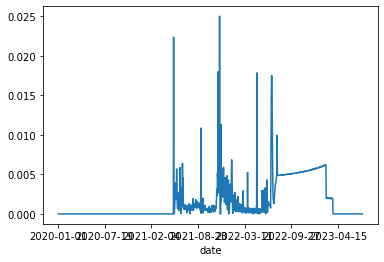

In [35]:
a = pd.read_csv('data/parameter_ts/vacc_R15_age0to17_dose1_scn1.csv').set_index('date')
a['11000'].plot()
fig.autofmt_xdate()

In [28]:
gempyor_simulator.debug_p_draw[gempyor_simulator.s.parameters.pnames.index('nu1age0to17_R14')]

array([[8.400e-05, 5.360e-04, 6.230e-04, ..., 3.780e-04, 4.090e-04,
        6.640e-04],
       [0.000e+00, 3.710e-04, 4.740e-04, ..., 2.150e-04, 2.310e-04,
        3.960e-04],
       [2.330e-04, 0.000e+00, 2.030e-04, ..., 1.640e-04, 4.800e-04,
        3.270e-04],
       ...,
       [2.900e-05, 1.717e-03, 2.726e-03, ..., 1.470e-04, 3.040e-04,
        5.310e-04],
       [3.800e-05, 1.683e-03, 1.966e-03, ..., 1.460e-04, 3.030e-04,
        5.290e-04],
       [3.800e-05, 1.723e-03, 2.025e-03, ..., 1.460e-04, 3.030e-04,
        5.280e-04]])

In [8]:
gempyor_simulator.debug_parameters.shape # after NPIs

(45, 343, 51)

In [25]:
gempyor_simulator.debug_parameters.shape # after NPIs

(45, 343, 51)

1*nu1age0to17_R14


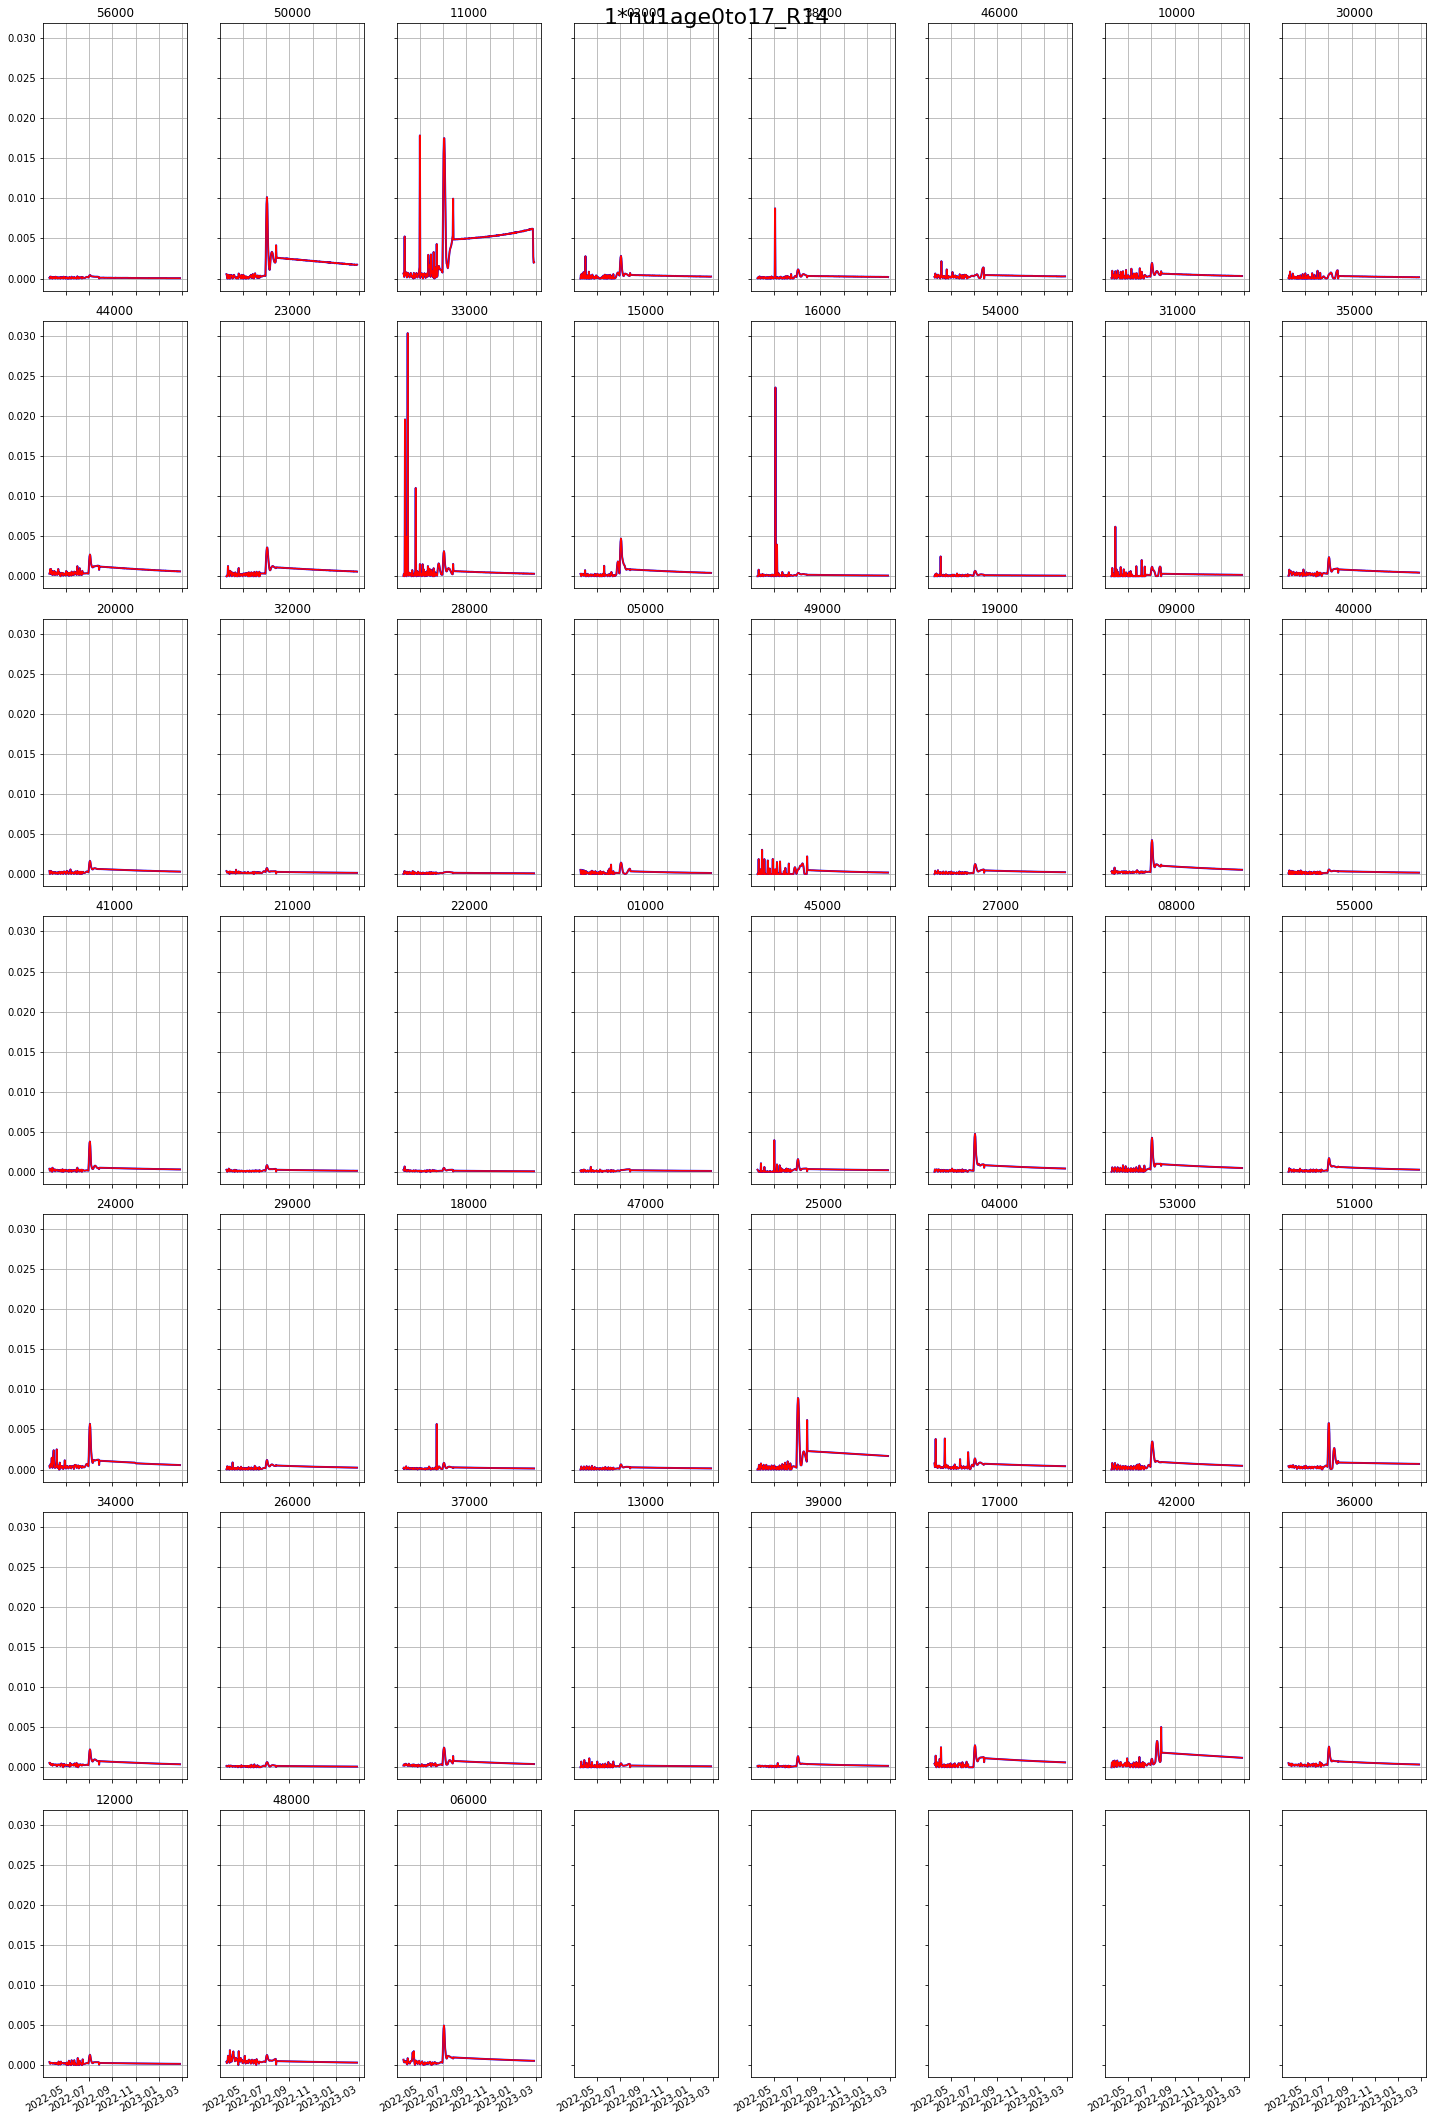

In [30]:
uniq_pname = '1*nu1age0to17_R14'
data_p = gempyor_simulator.debug_parsed_parameters[gempyor_simulator.unique_strings.index(uniq_pname)]
data_p1 = gempyor_simulator.debug_p_draw[gempyor_simulator.s.parameters.pnames.index('nu1age0to17_R14')]
fig, axes = plt.subplots(7, 8, figsize=(20, 30), sharex=True, sharey=True)
fig.suptitle(uniq_pname, fontsize=22)
print(uniq_pname)
for i, geoid in enumerate(gempyor_simulator.s.spatset.nodenames):
    ax = axes.flat[i]
    ax.set_title(geoid)
    ax.grid()
    df = pd.DataFrame(data_p[:,i], index=pd.date_range(gempyor_simulator.s.ti, gempyor_simulator.s.tf, freq="D"))
    ax.plot(df, c='b', lw=2)#[:'2021-12-31'])
    f = pd.DataFrame(data_p1[:,i], index=pd.date_range(gempyor_simulator.s.ti, gempyor_simulator.s.tf, freq="D"))
    ax.plot(df, c='r')#[:'2021-12-31'])
    fig.autofmt_xdate()
fig.tight_layout()

1*nu1age0to17_R14
1*nu1age18to64_R14
1*nu1age65to100_R14
1*nu5age0to17_R14
1*nu5age18to64_R14
1*nu5age65to100_R14
1*nu3age0to17_R14
1*nu3age18to64_R14
1*nu3age65to100_R14
1*nu2_R14


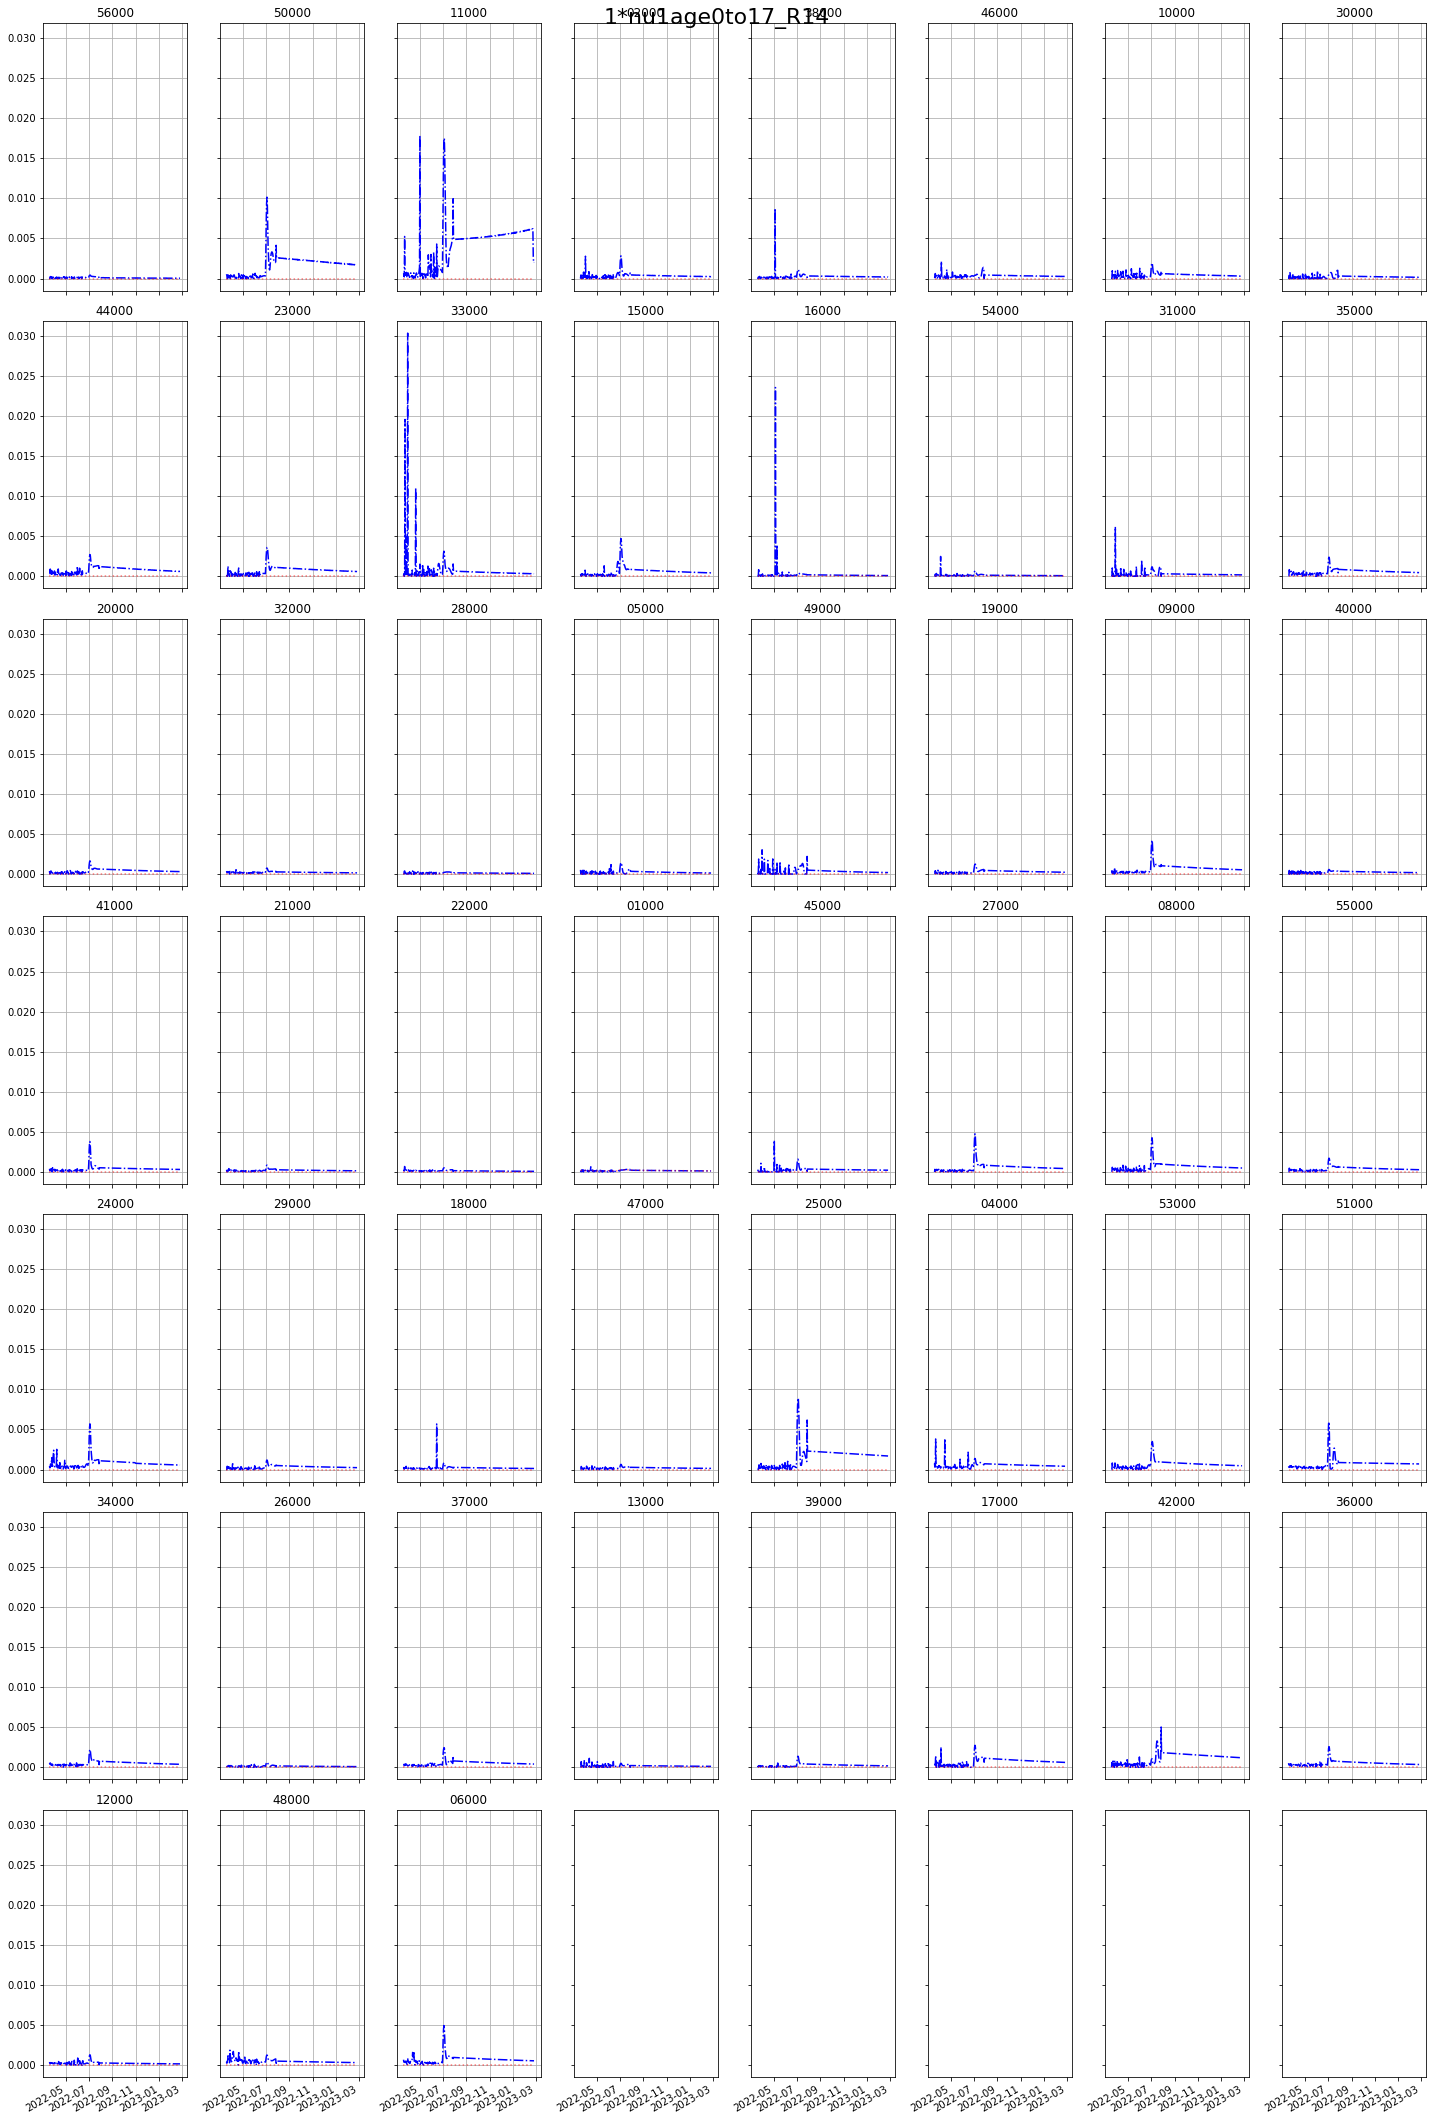

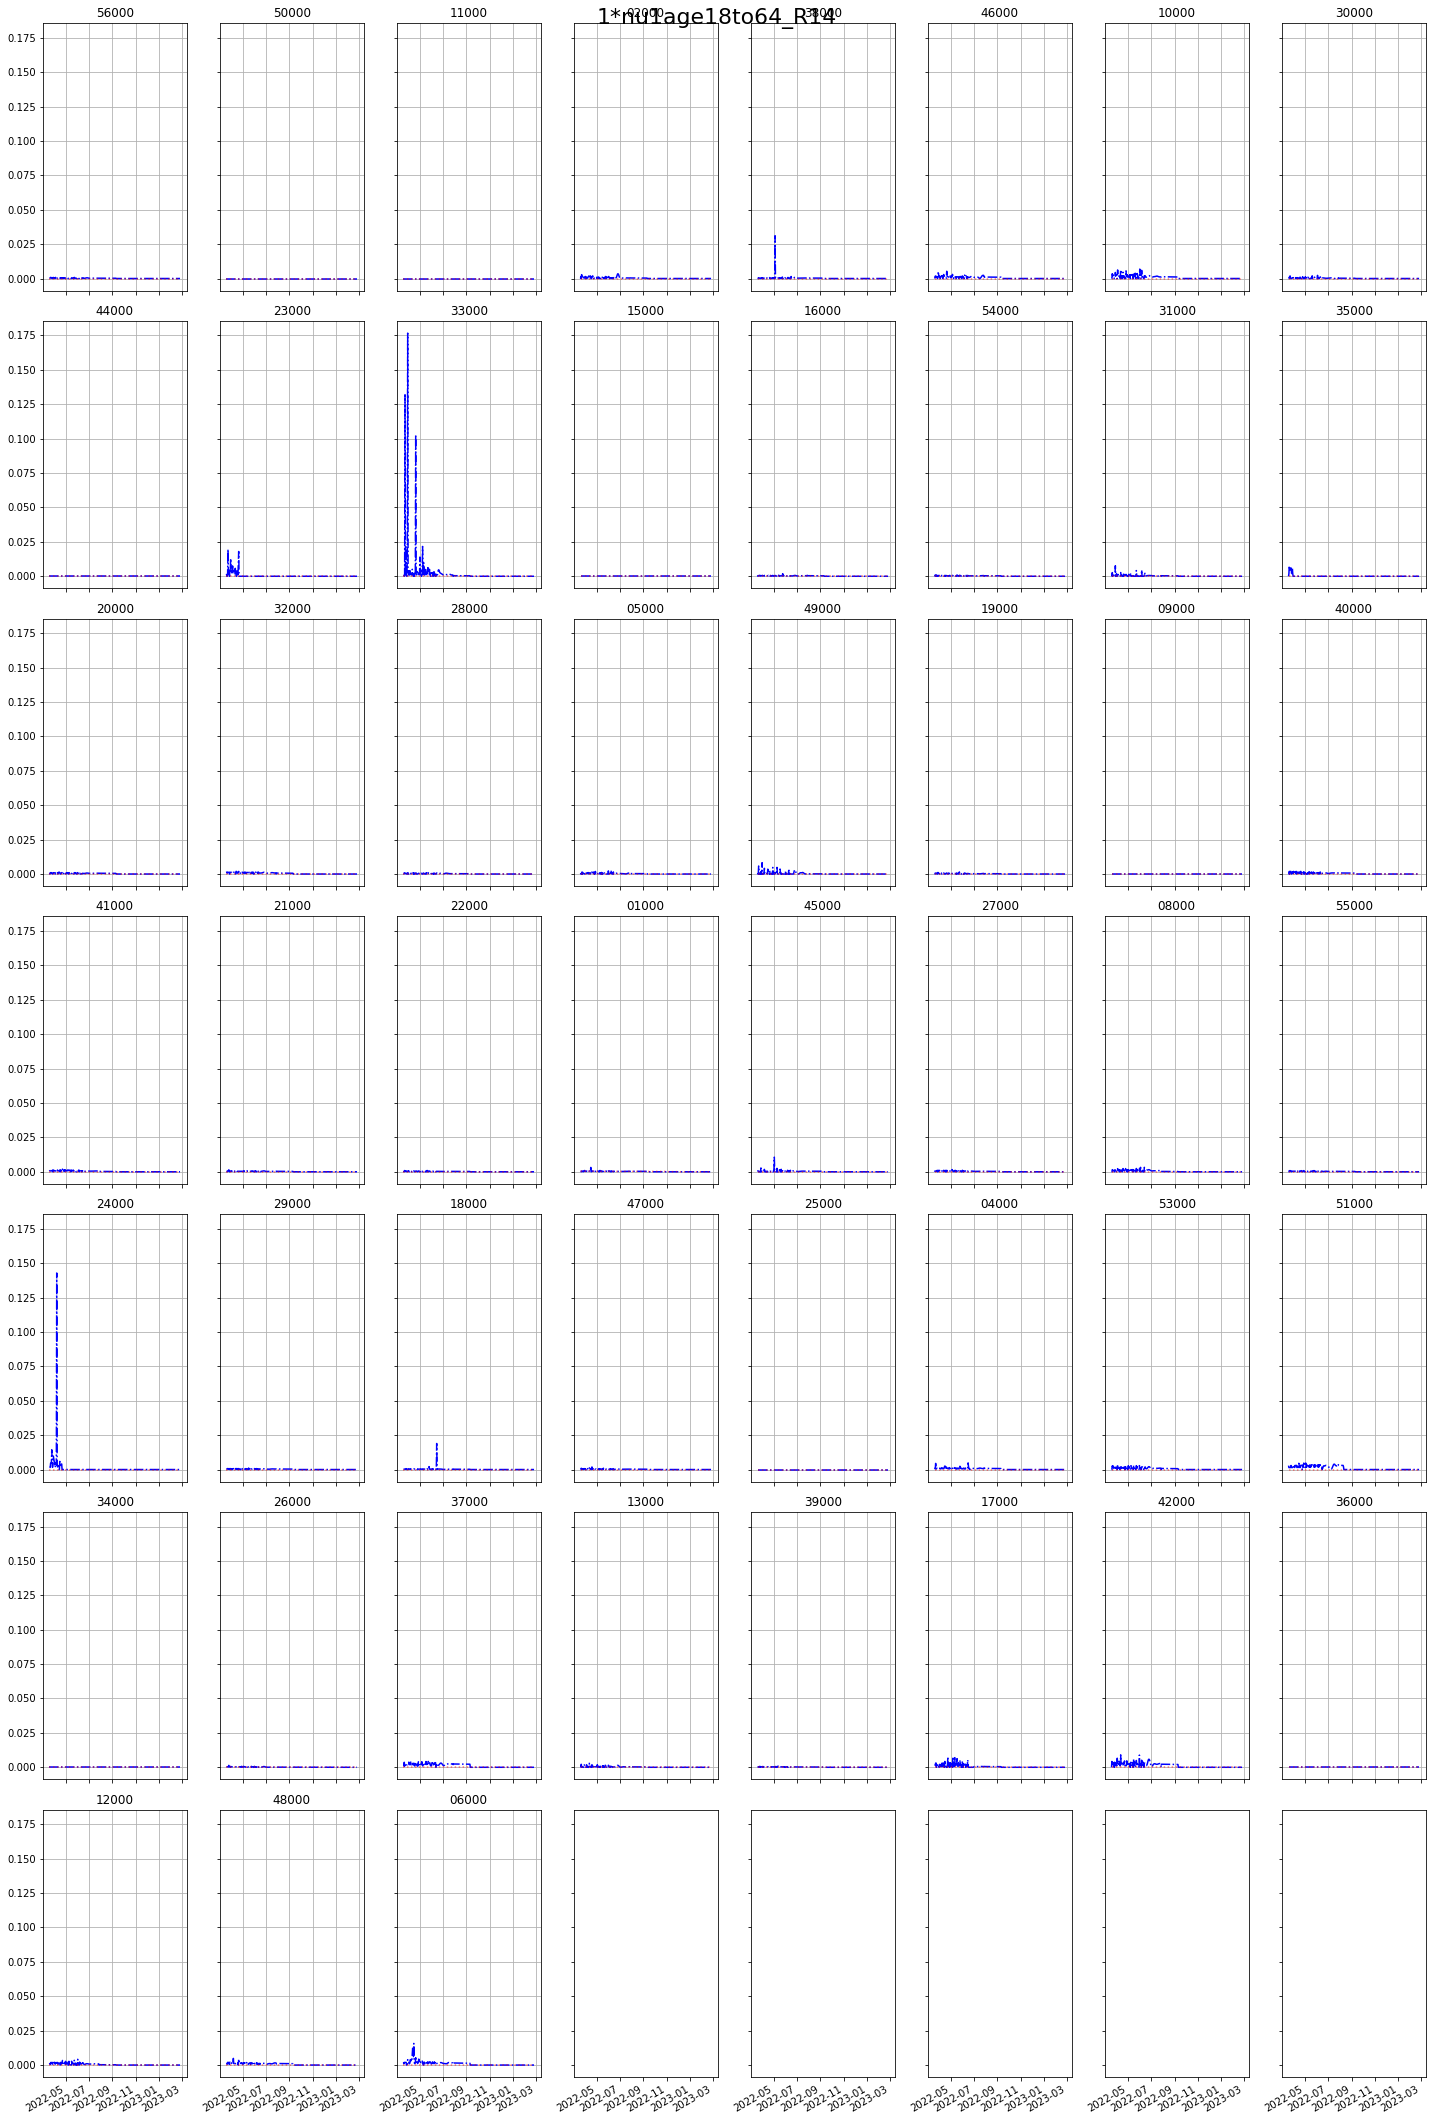

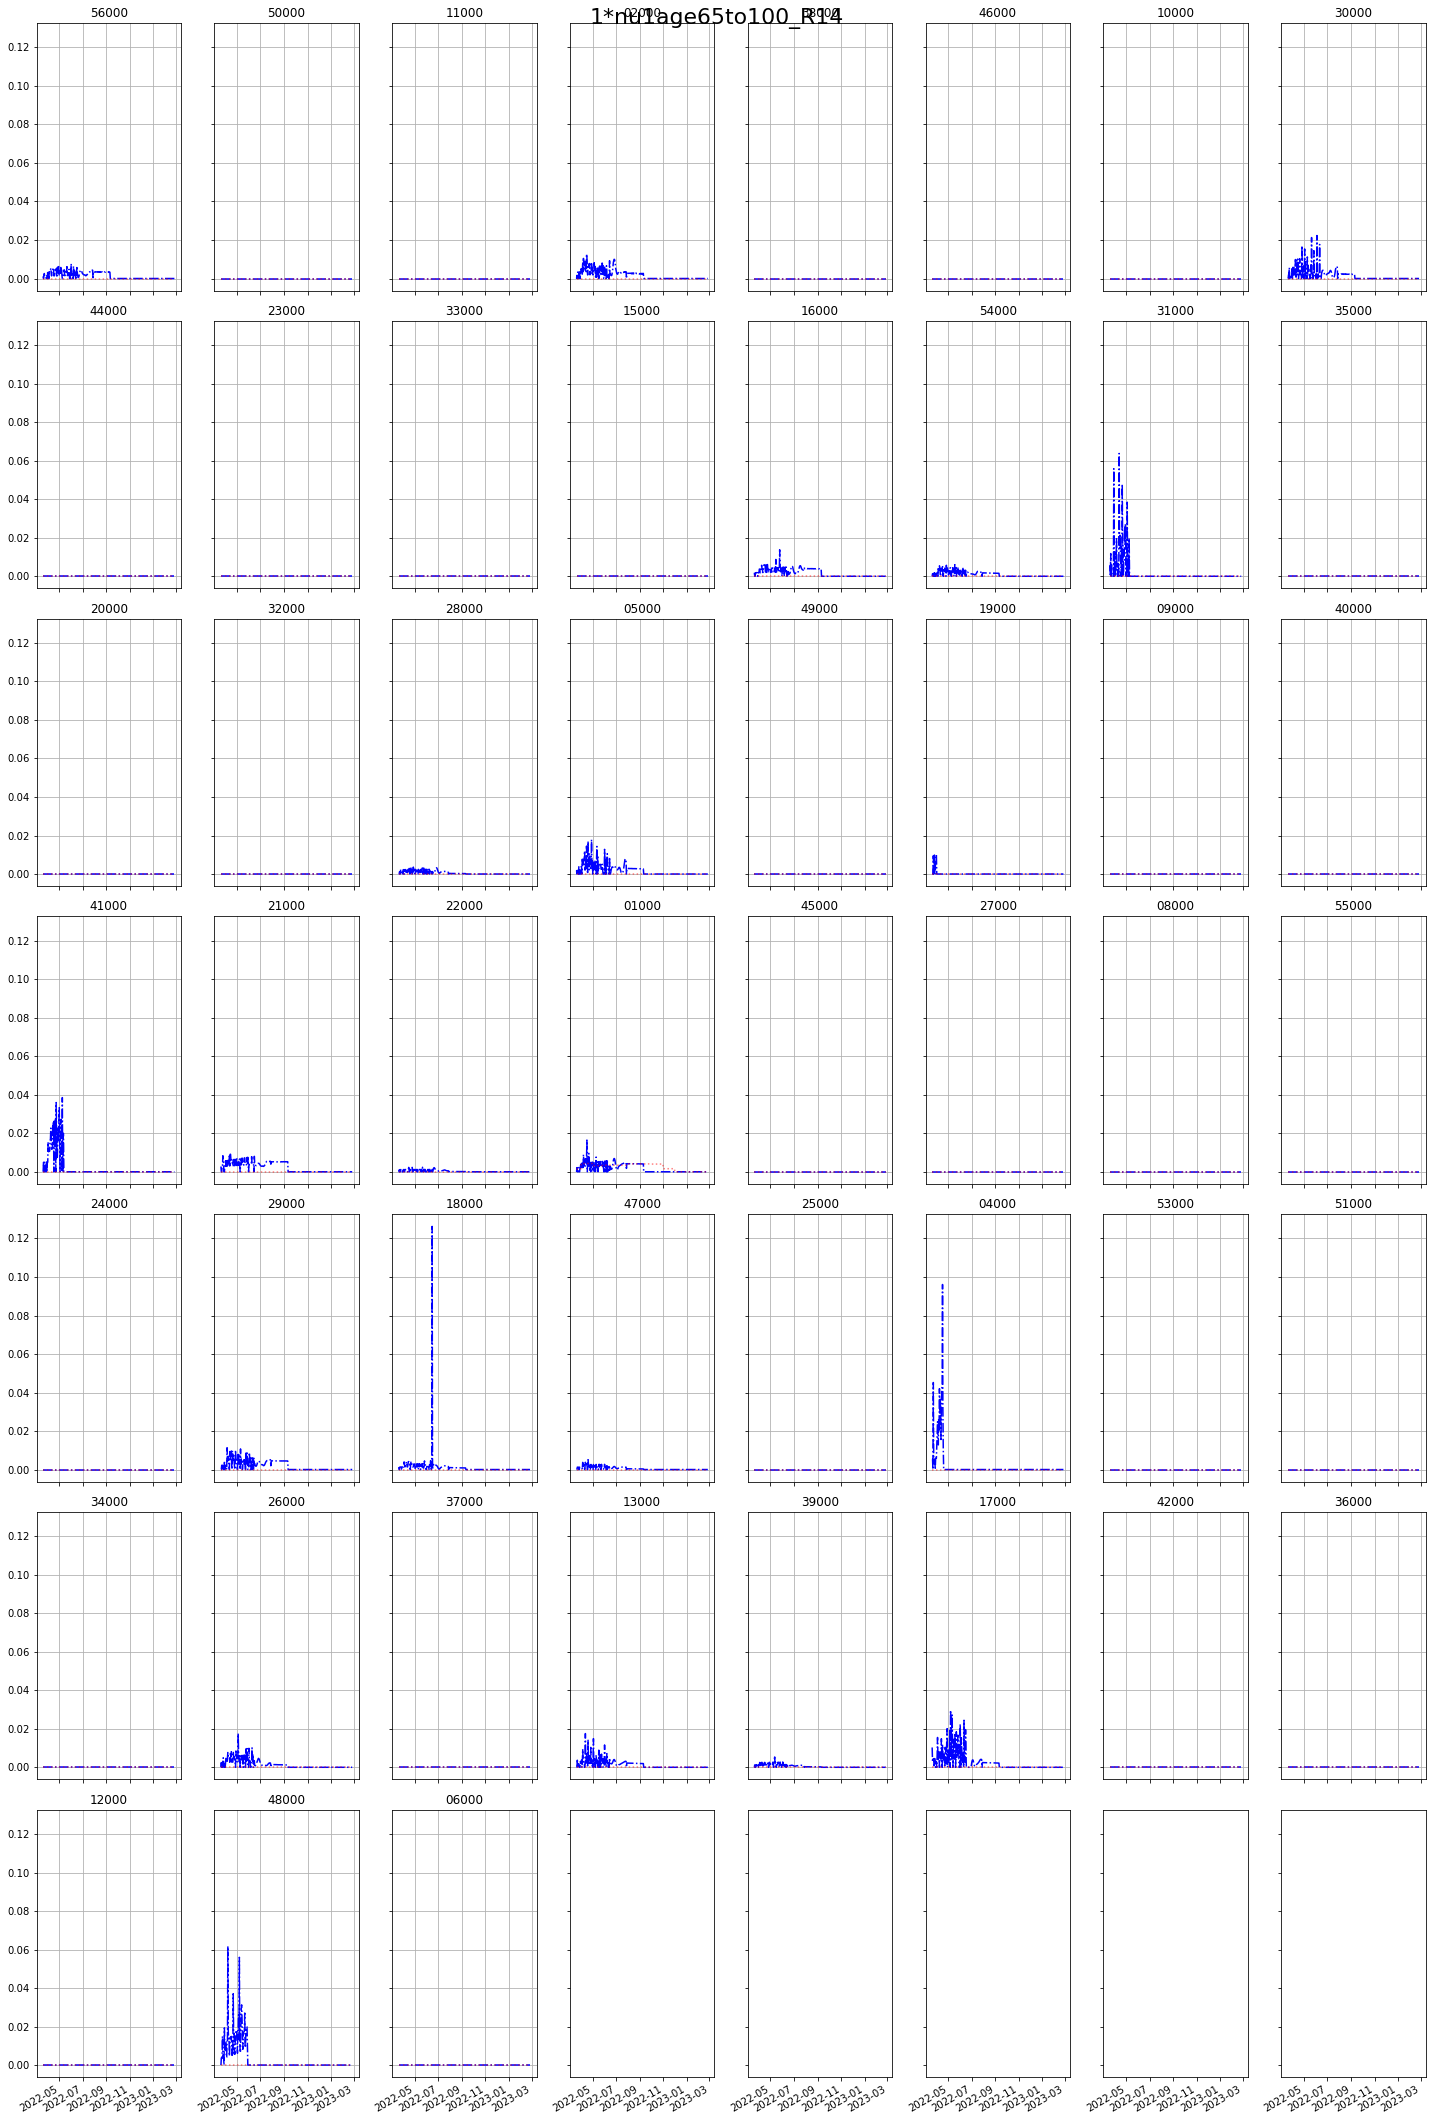

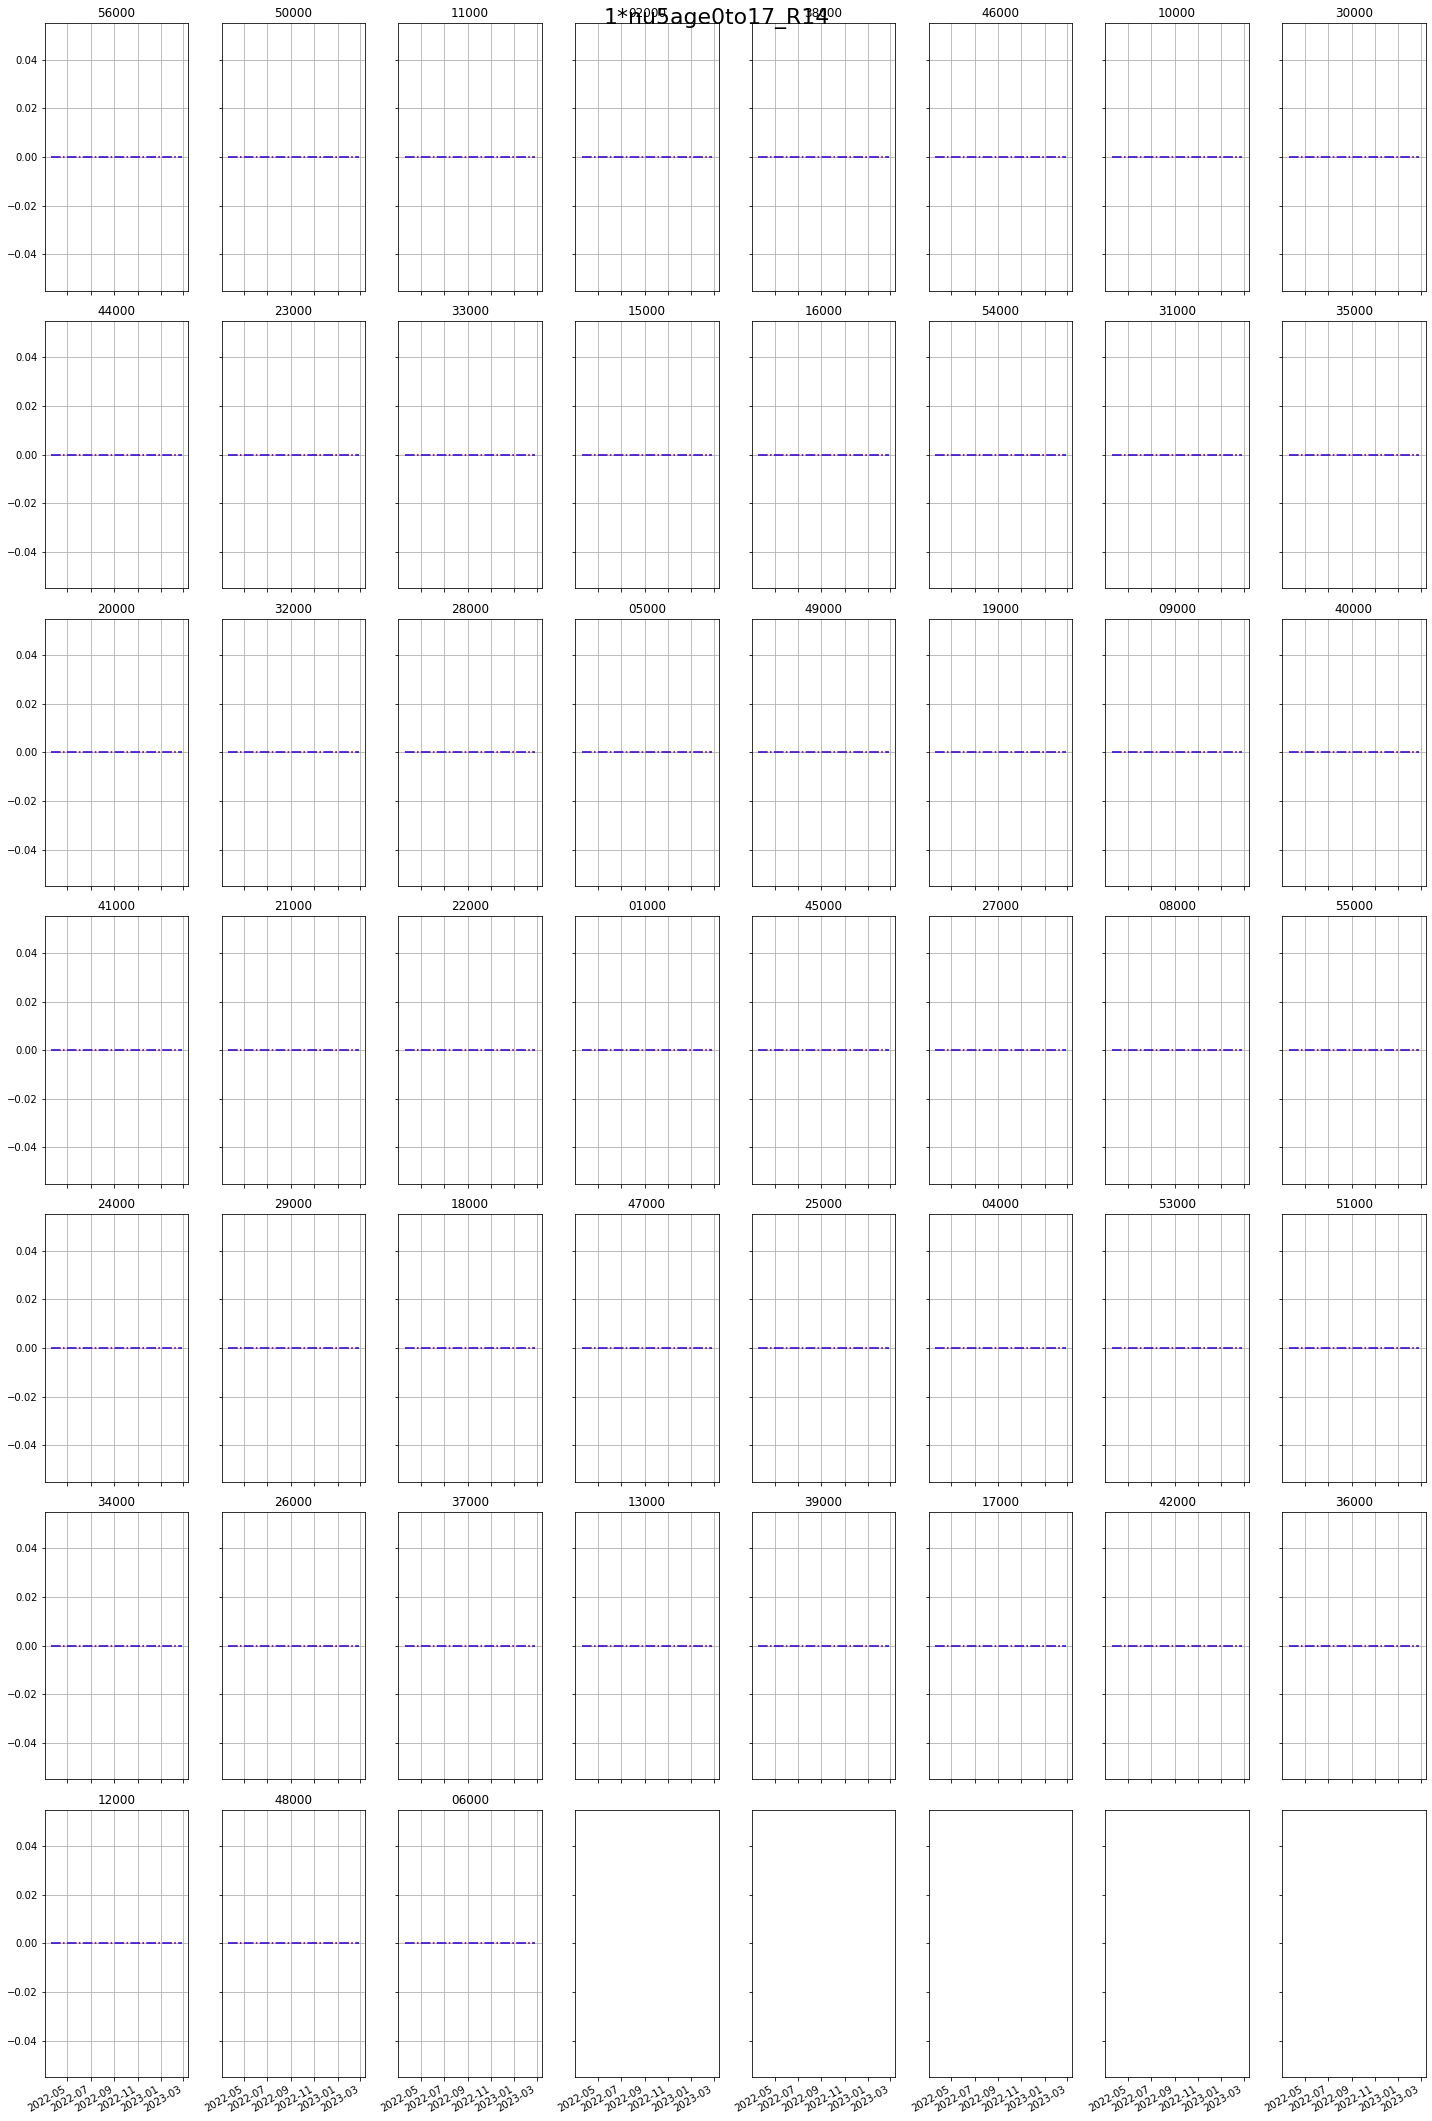

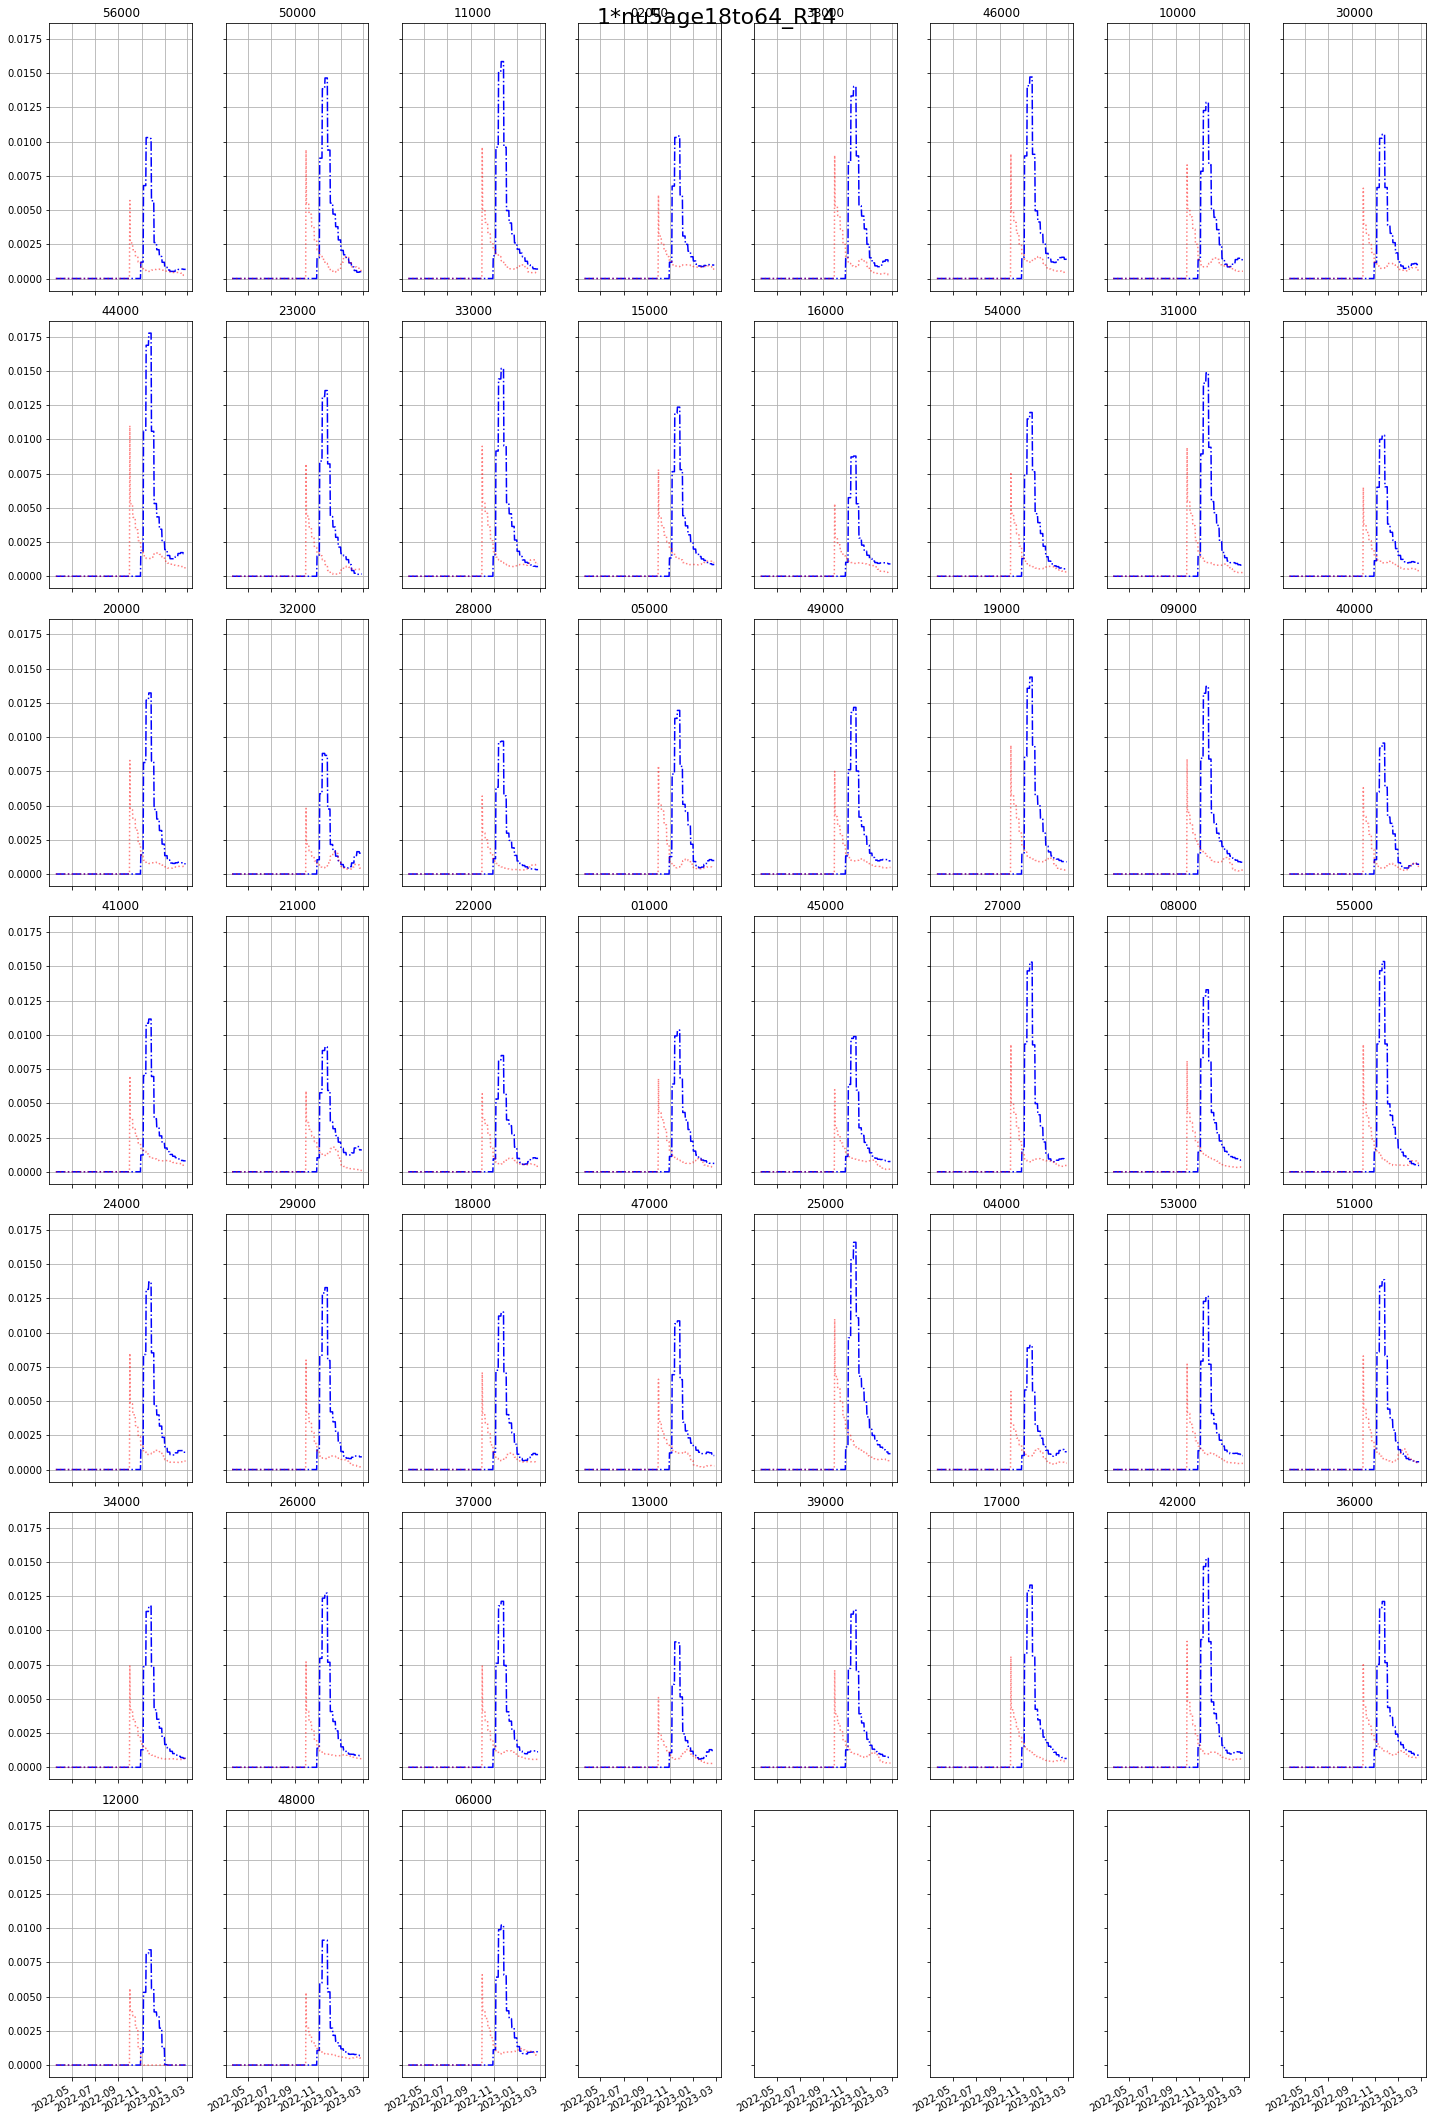

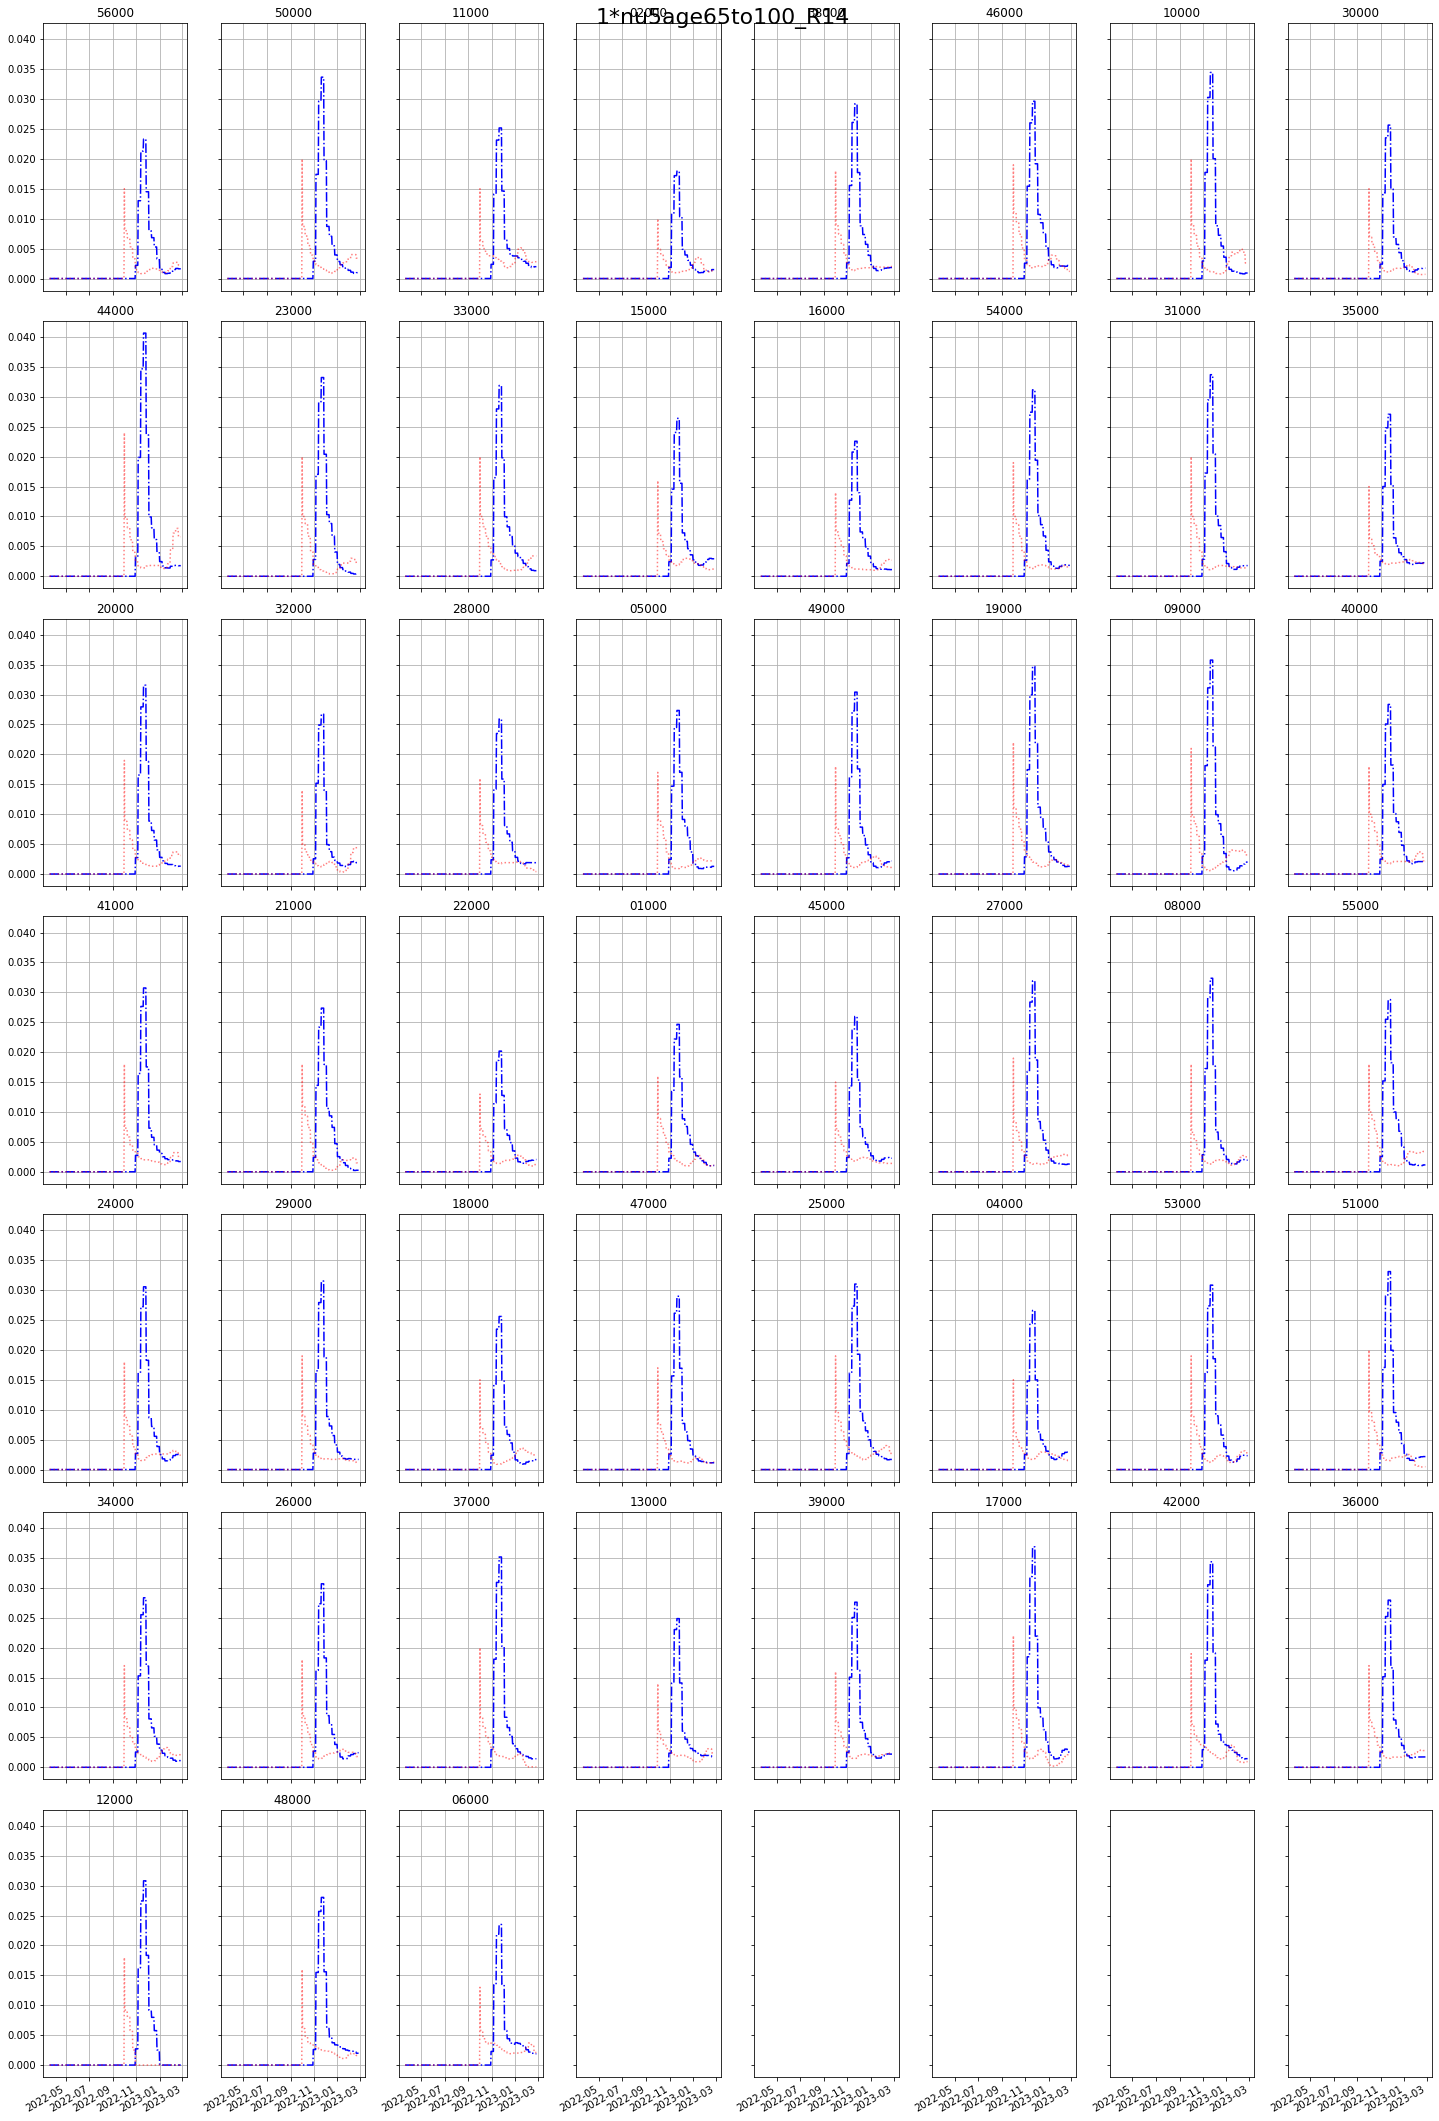

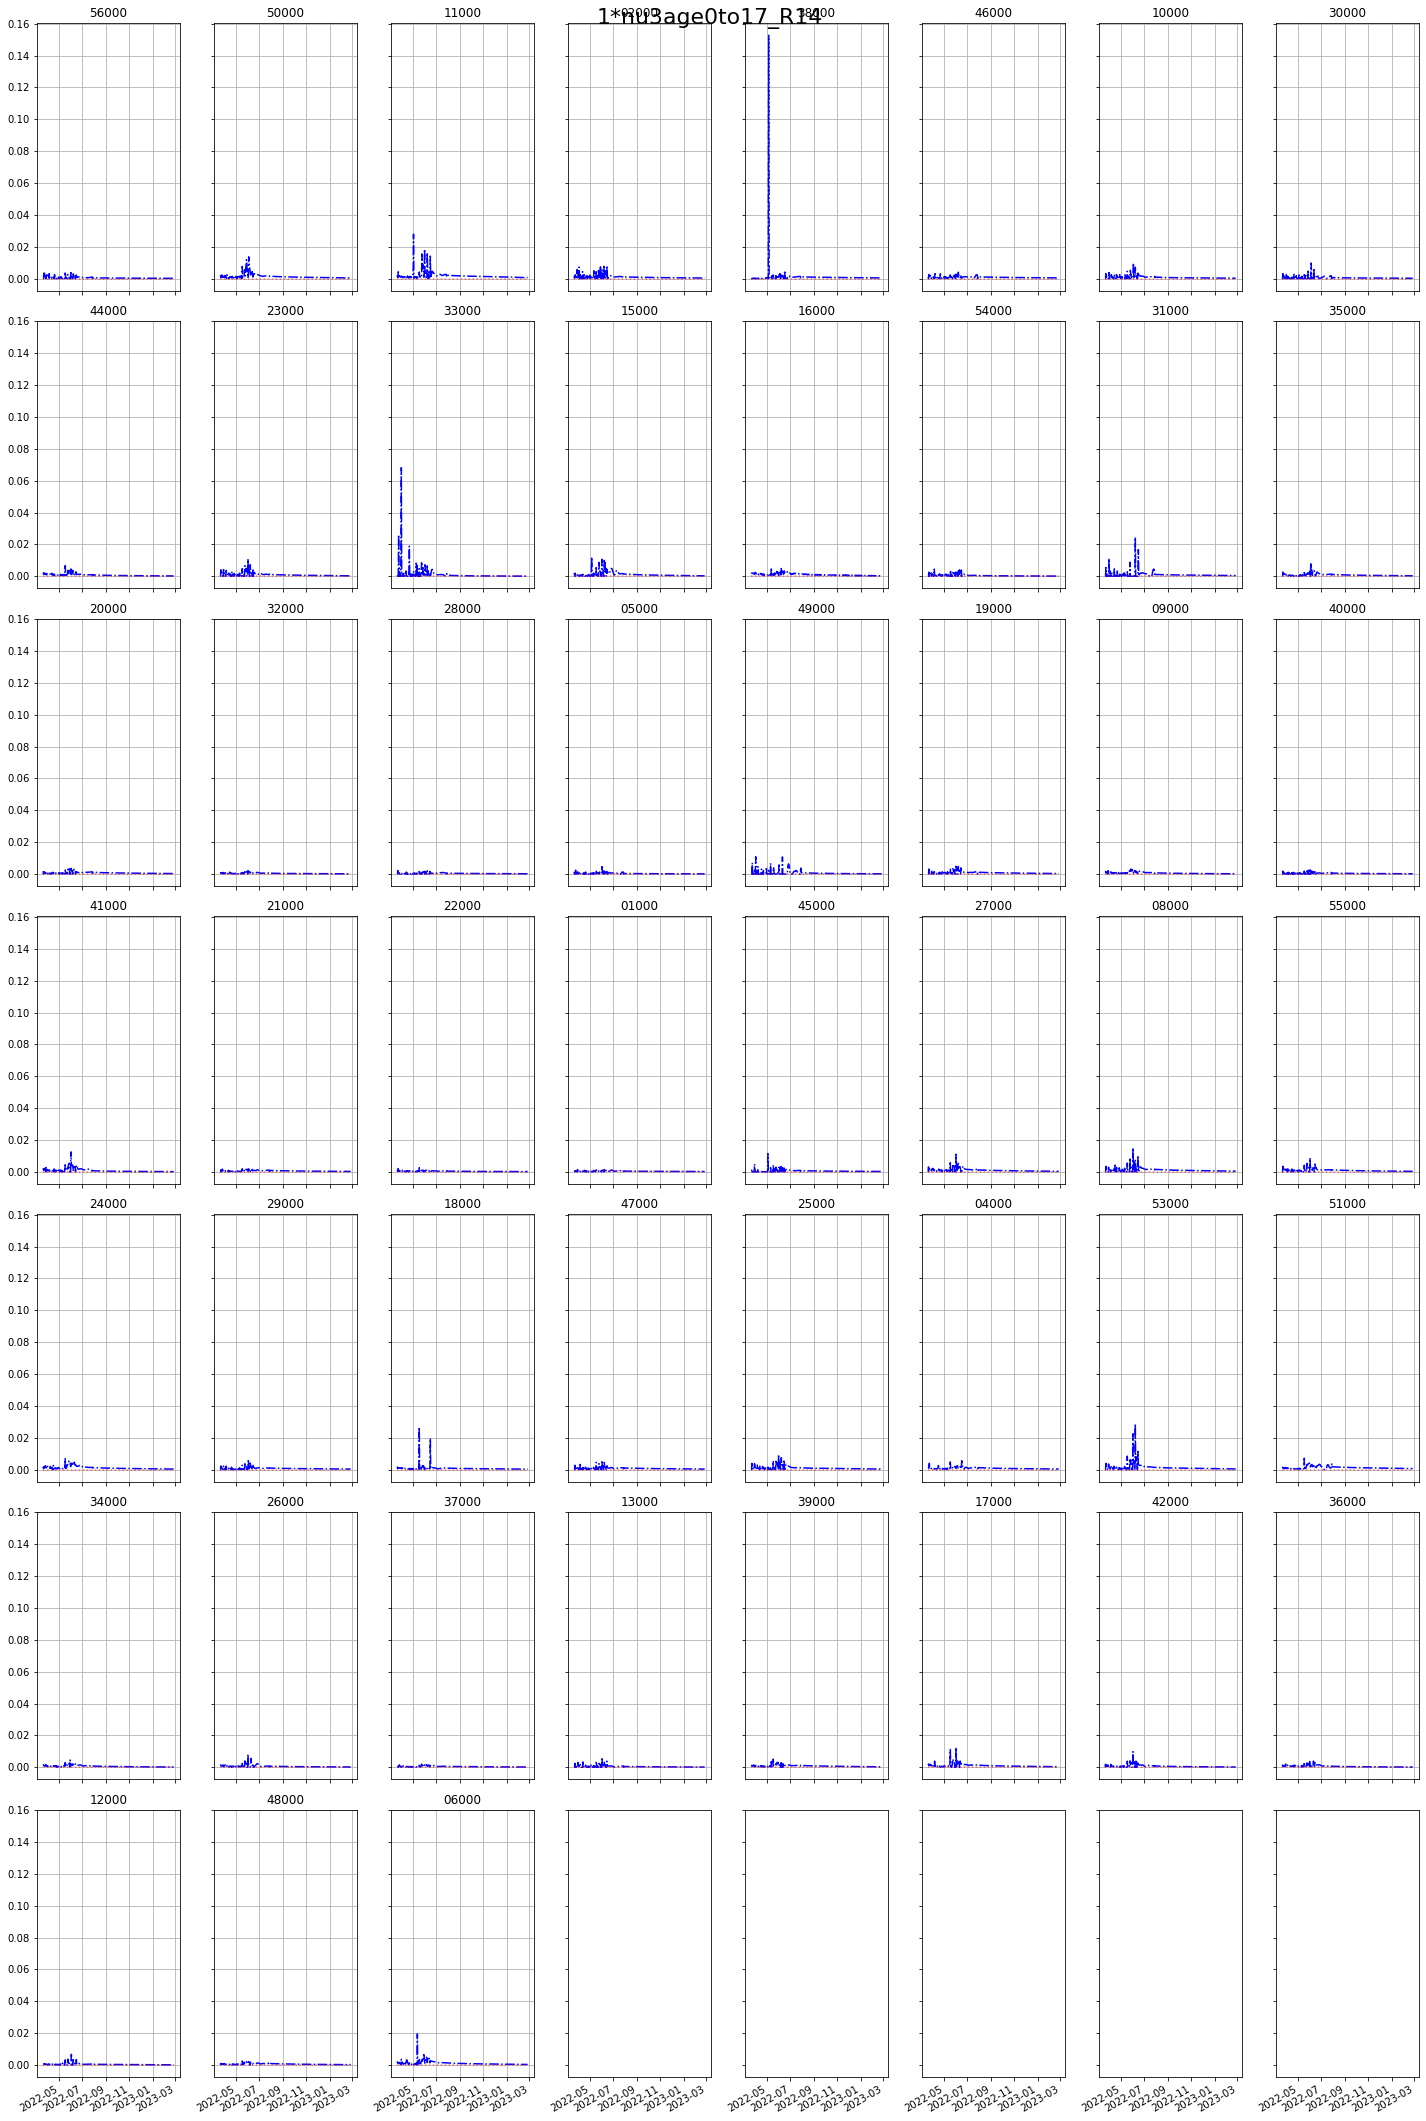

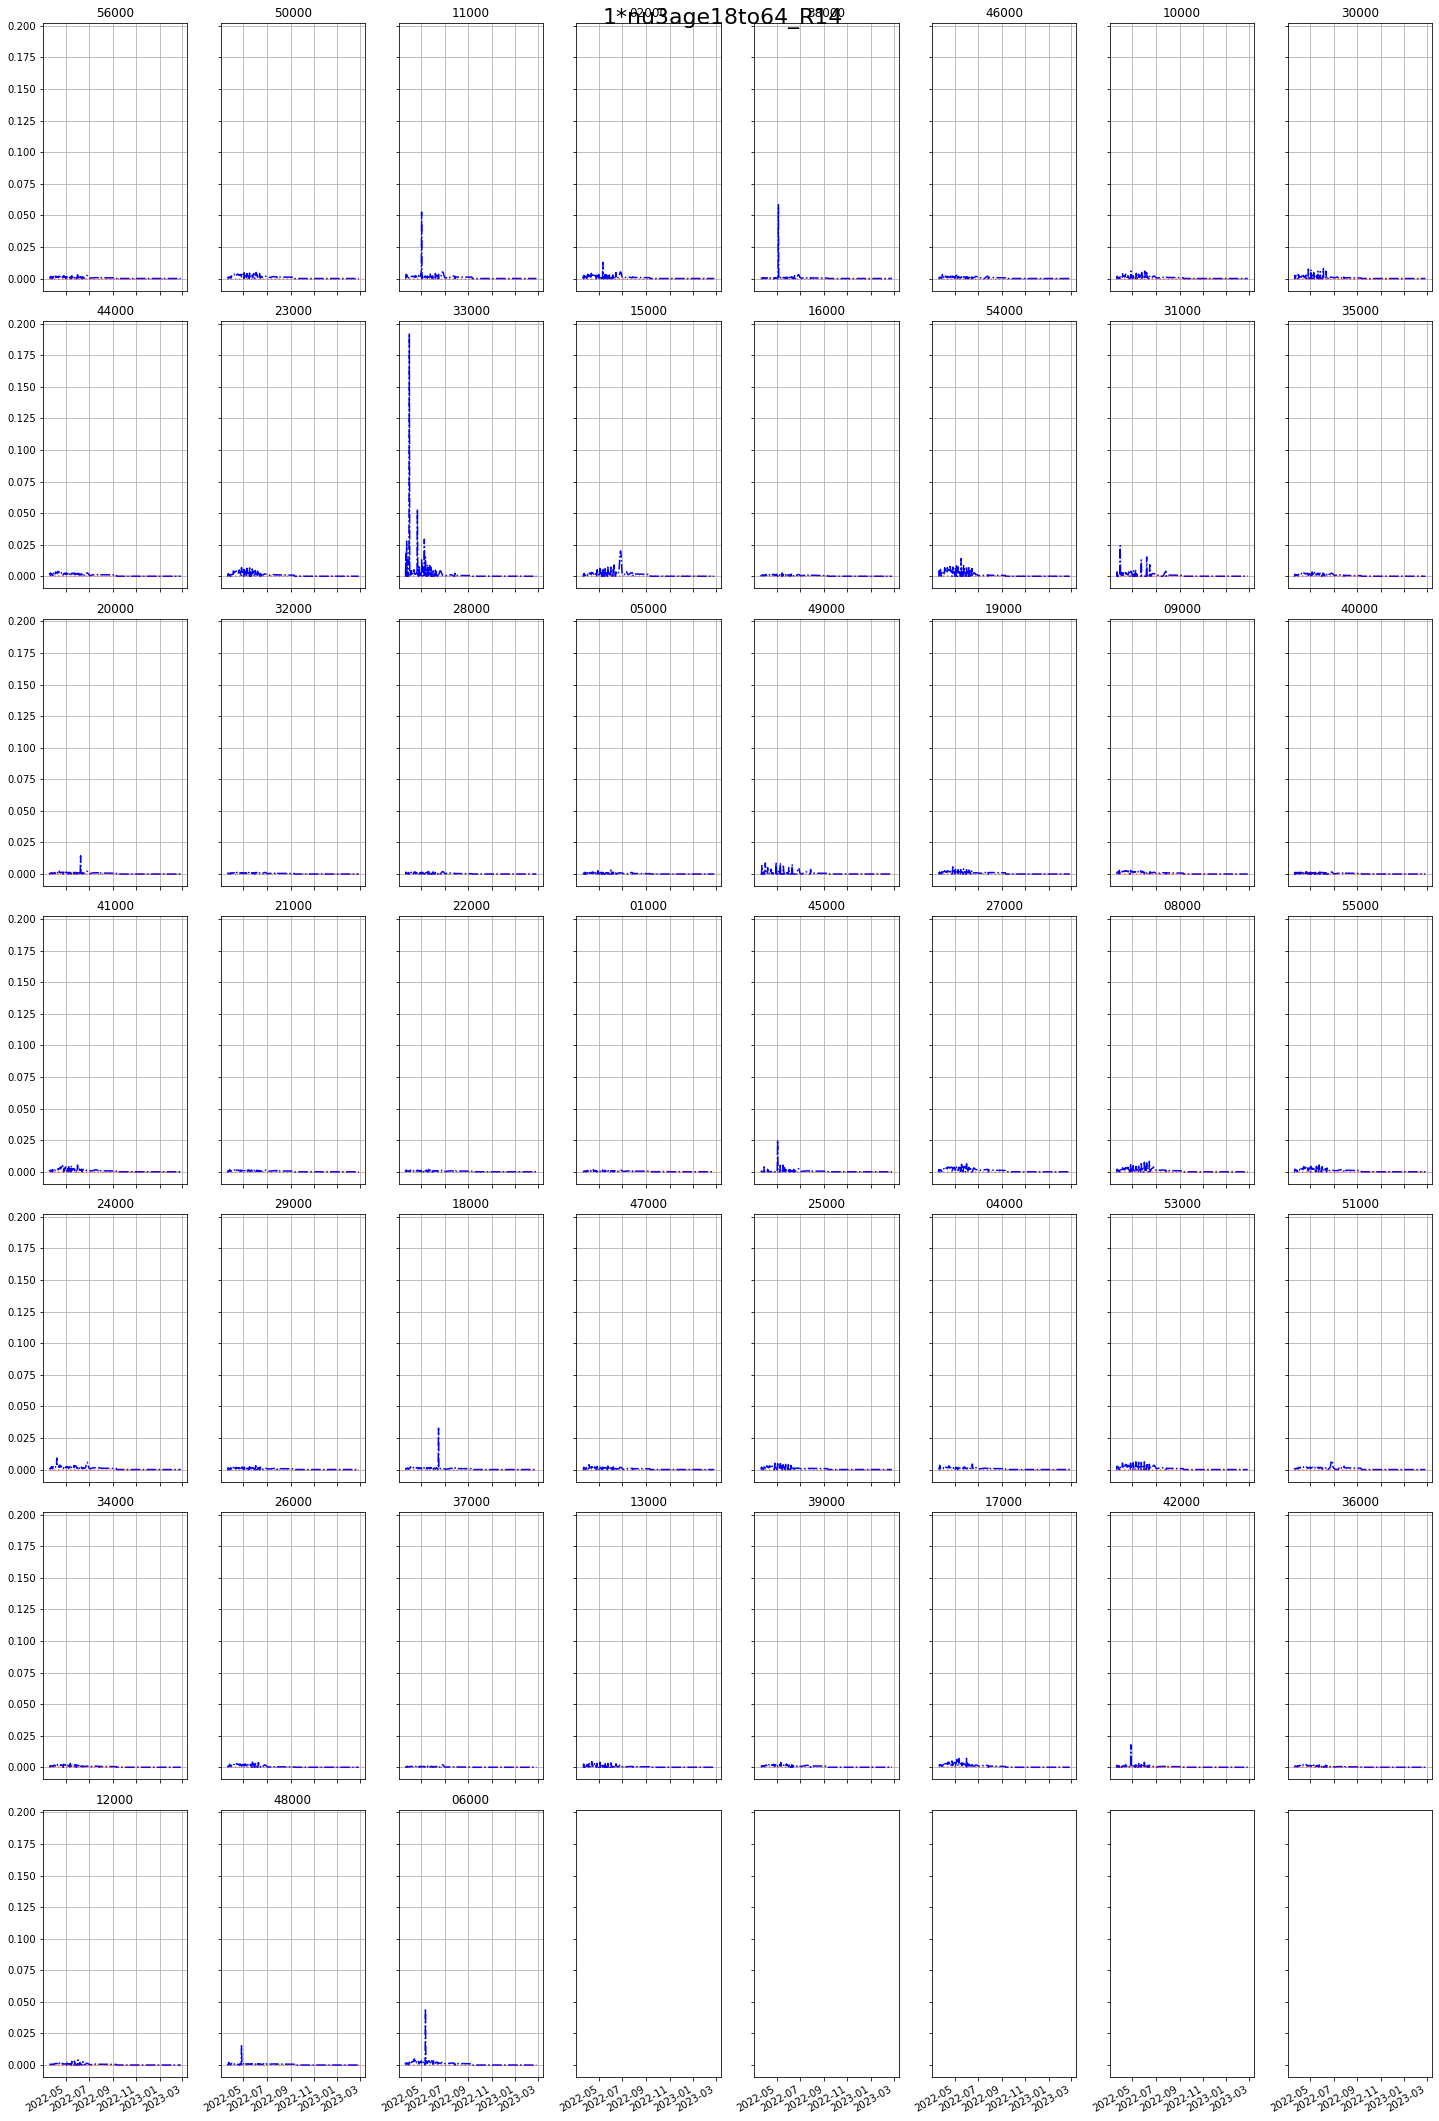

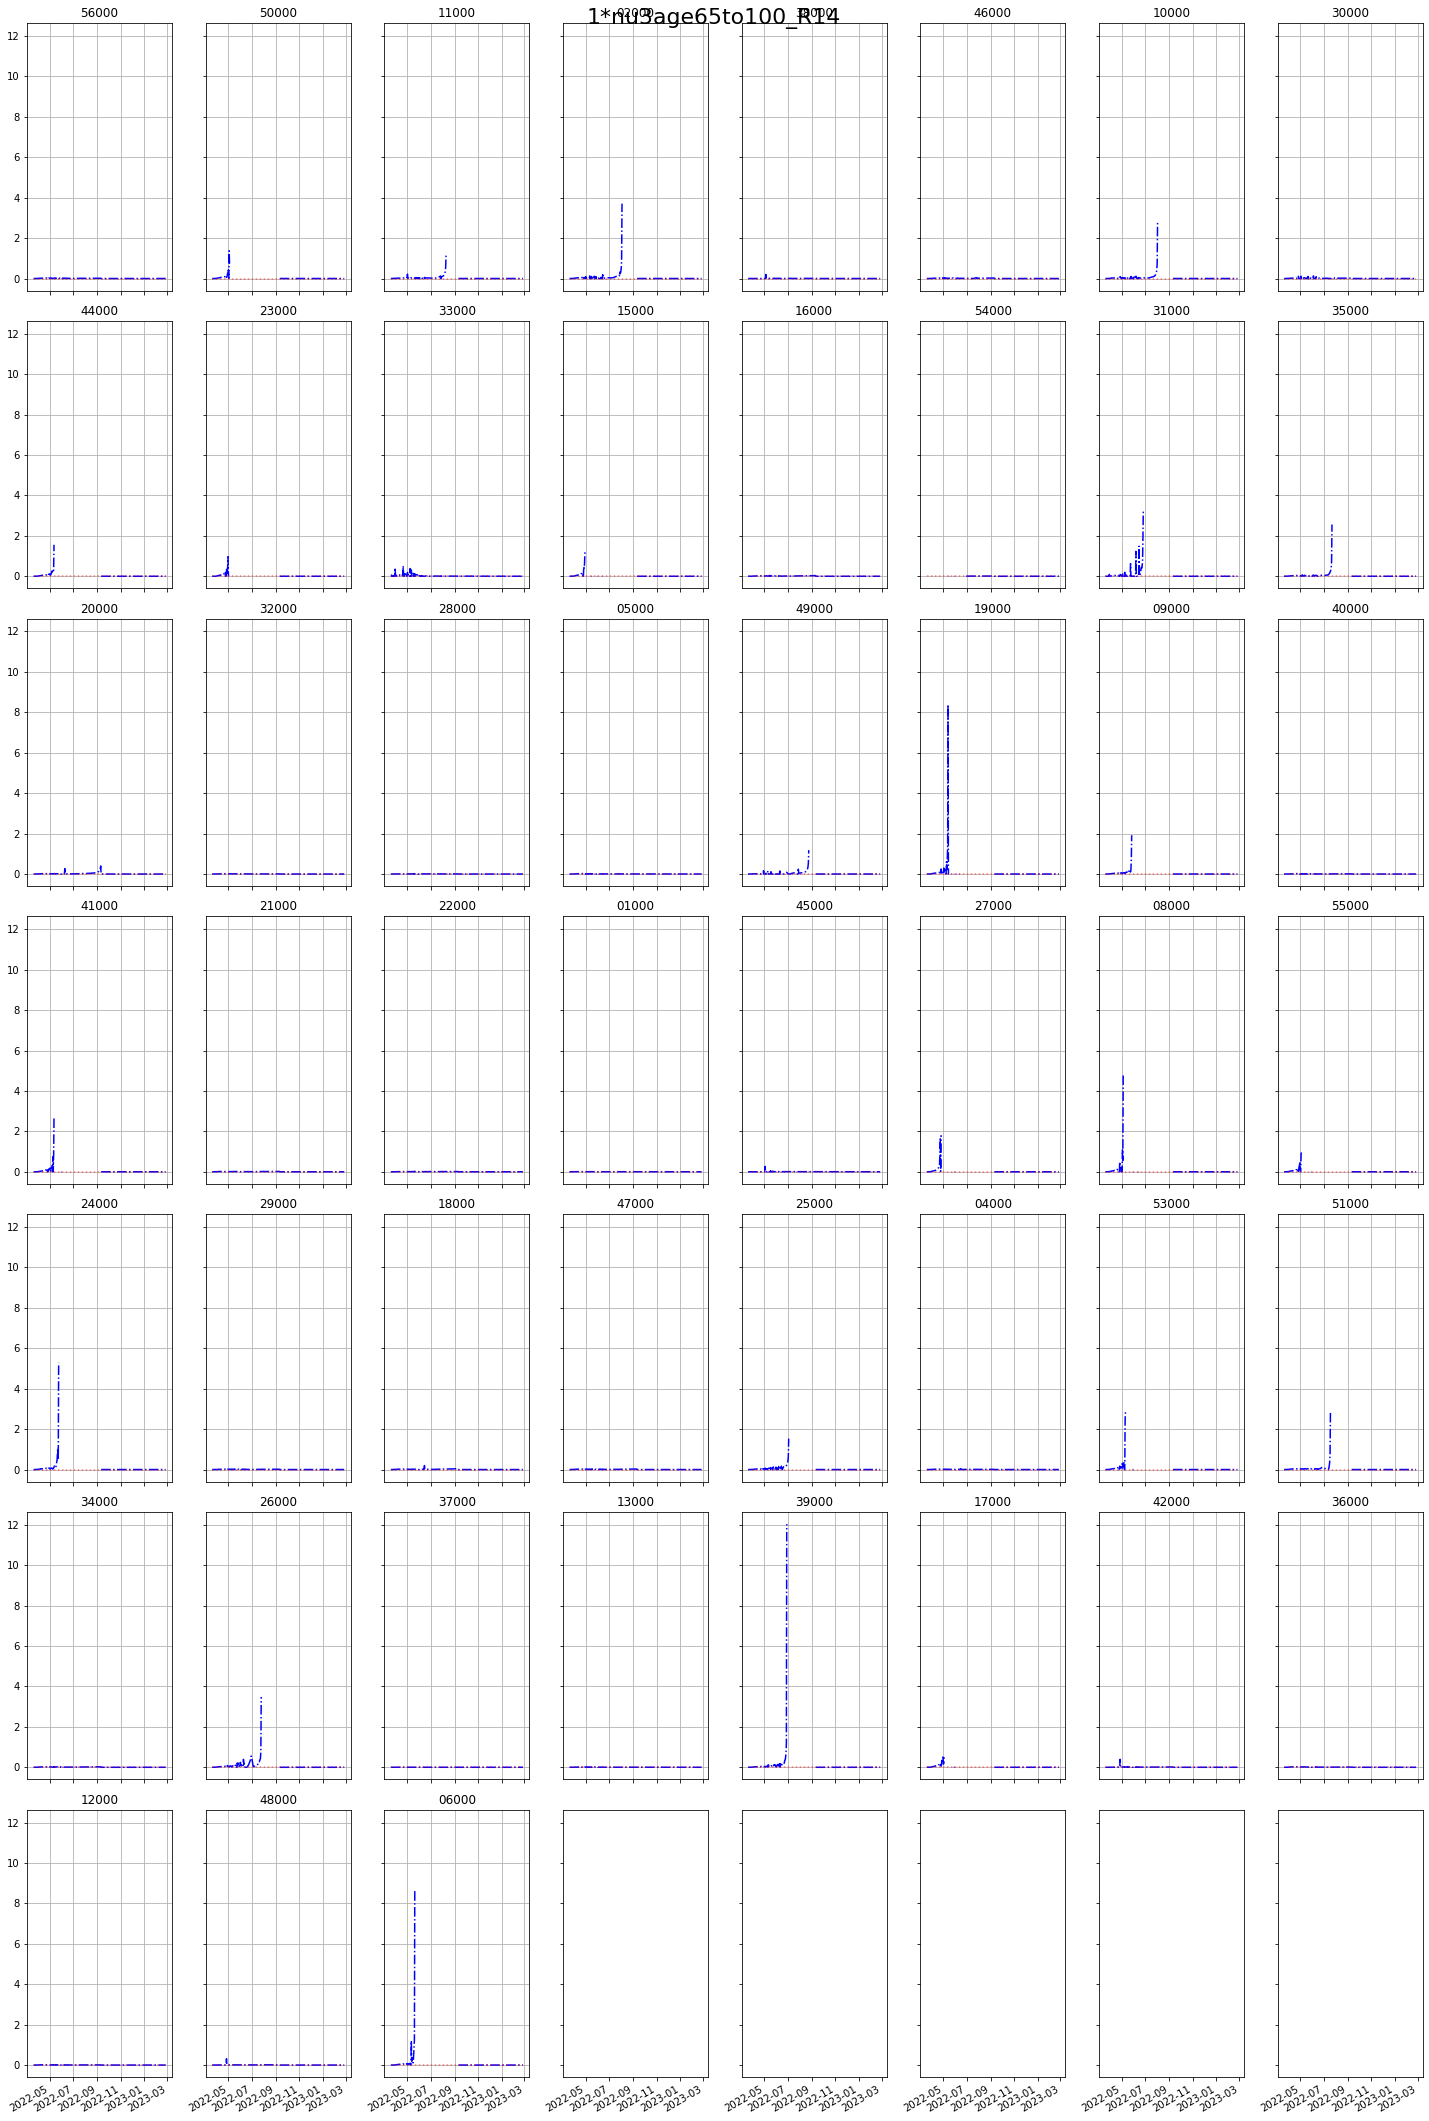

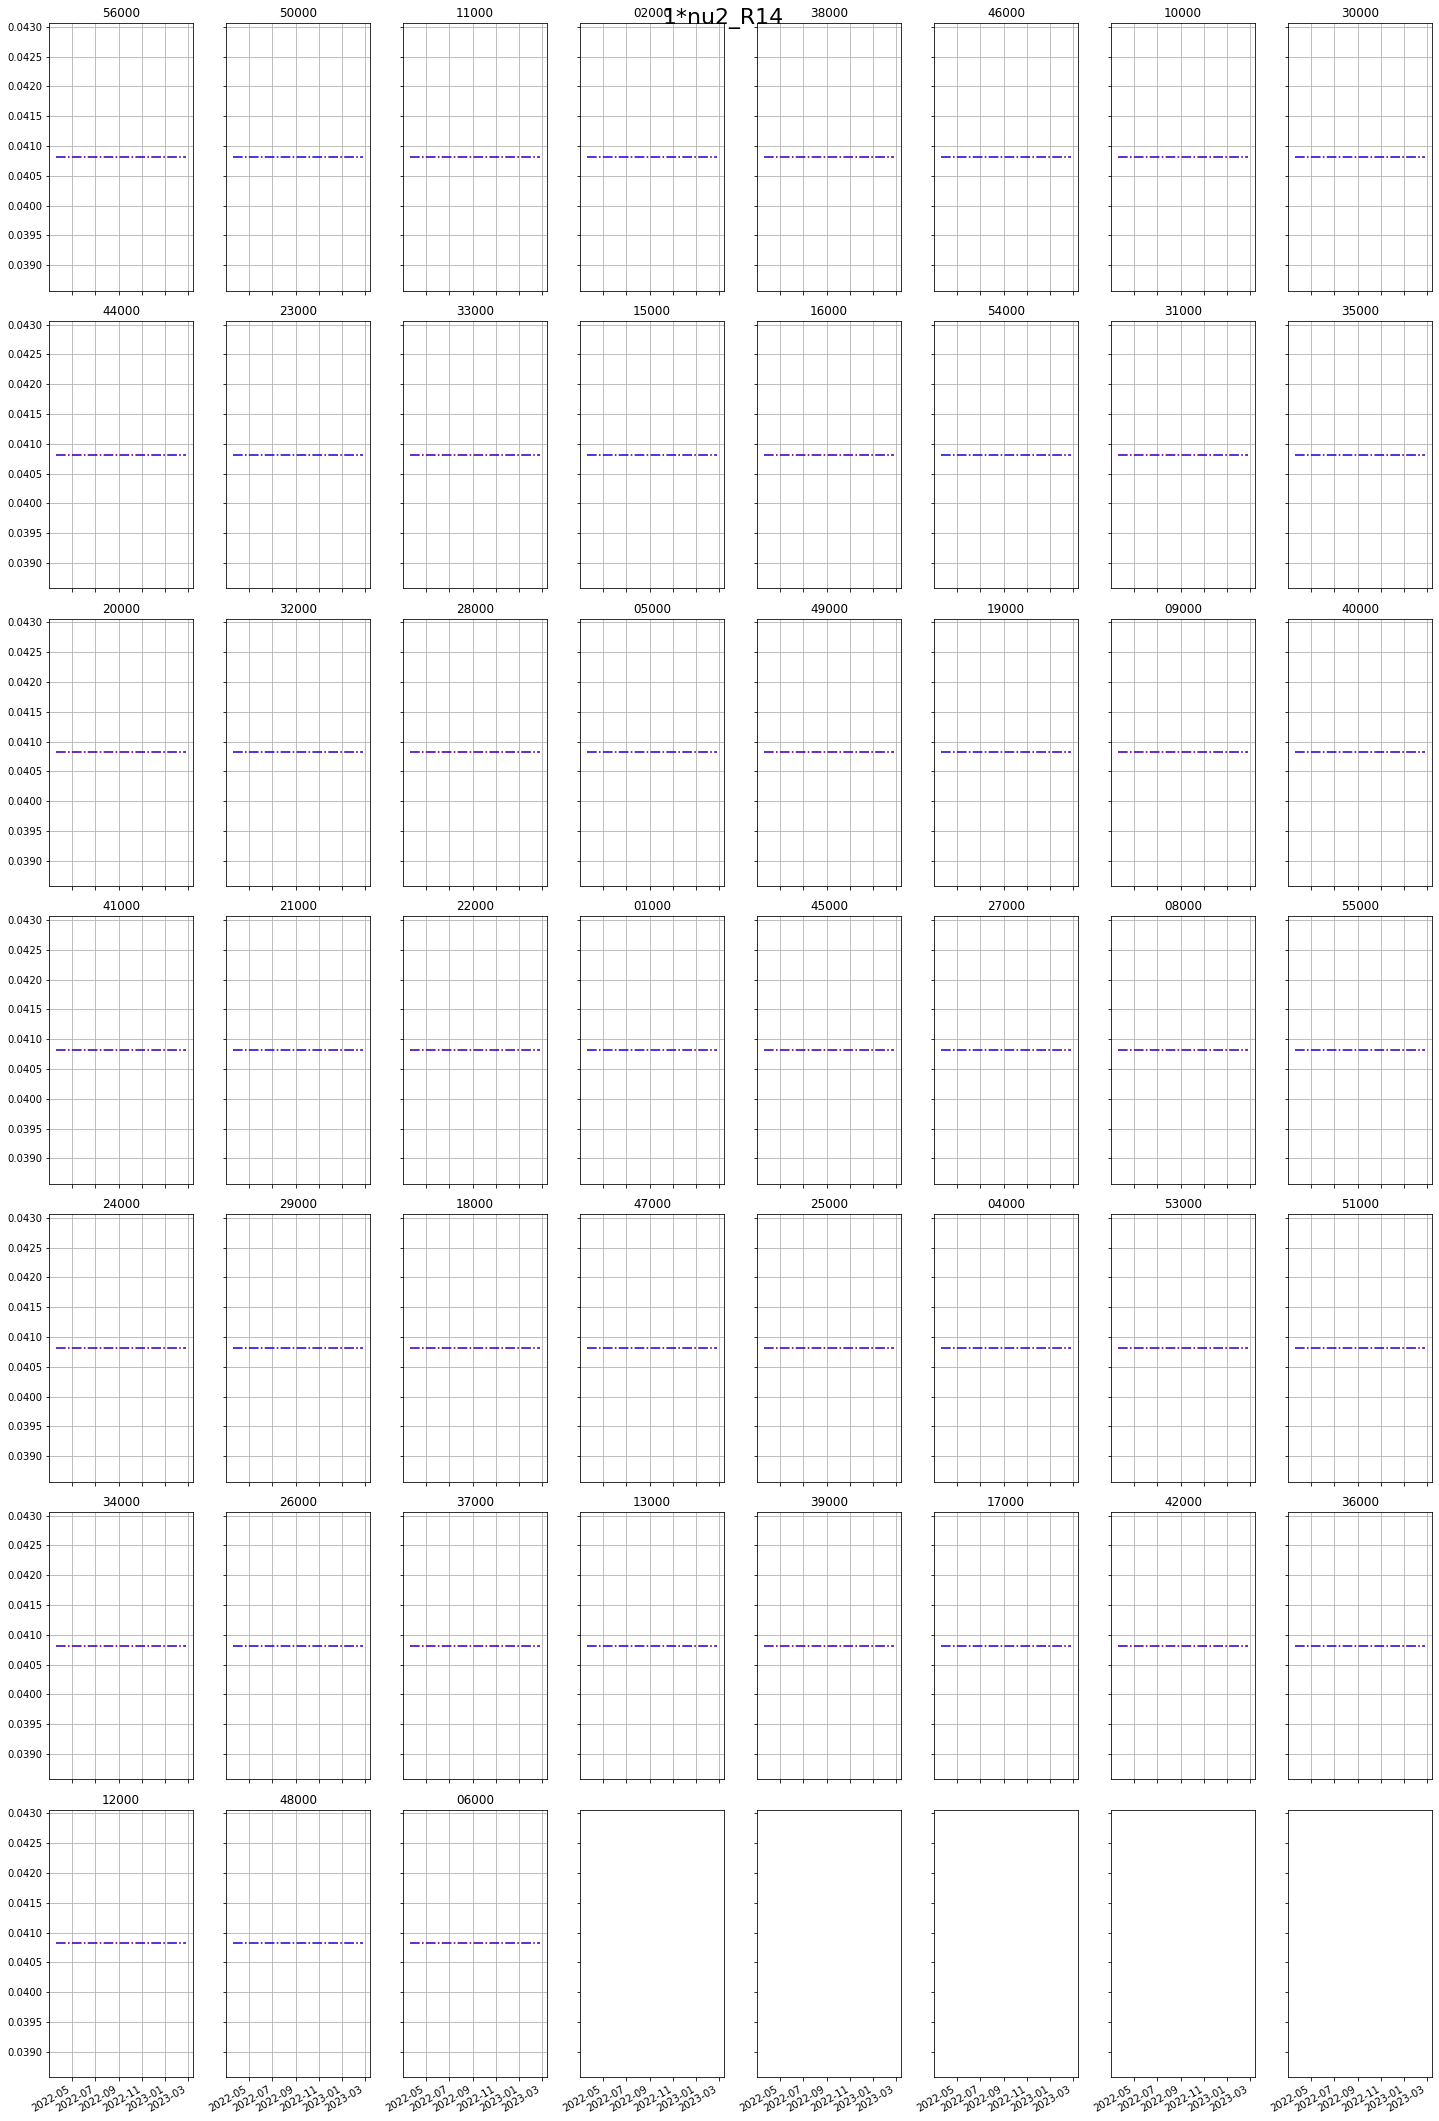

In [24]:
pdf = PdfPages(f'Unique Parsed Parameter taking just nu for {config_filepath[:-4]} with ts.pdf')
d = pdf.infodict()
d["Title"] = "parsed parameters"
d["Author"] = "jlemaitre"

for k,uniq_pname in enumerate(gempyor_simulator.unique_strings):
    if 'nu' in uniq_pname:
        fig, axes = plt.subplots(7, 8, figsize=(20, 30), sharex=True, sharey=True)
        fig.suptitle(uniq_pname, fontsize=22)
        print(uniq_pname)
        for i, geoid in enumerate(gempyor_simulator.s.spatset.nodenames):
            ax = axes.flat[i]
            ax.set_title(geoid)
            ax.grid()
            df = pd.DataFrame(gempyor_simulator.debug_parsed_parameters[k,:,i], index=pd.date_range(gempyor_simulator.s.ti, gempyor_simulator.s.tf, freq="D"))
            ax.plot(df, c='blue', ls = '-.')
            df = pd.DataFrame(gempyor_simulator2.debug_parsed_parameters[k,:,i], index=pd.date_range(gempyor_simulator.s.ti, gempyor_simulator.s.tf, freq="D"))
            ax.plot(df, c='red', ls = ':', alpha=.5)
            fig.autofmt_xdate()
        fig.tight_layout()
        pdf.savefig(fig)
pdf.close()

In [ ]:
gempyor_simulator.one_simulation(sim_id2write=6, load_ID=True, sim_id2load=5)

In [ ]:
with open('integration_dump.pkl','rb') as fn_dump:
    states, states_daily_incid, ncompartments, nspatial_nodes, ndays, parameters, dt, transitions, proportion_info,  transition_sum_compartments, initial_conditions, seeding_data, seeding_amounts, mobility_data, mobility_row_indices, mobility_data_indices, population,  stochastic_p,  method = pickle.load(fn_dump)

In [ ]:
import numpy as np

In [ ]:
states[[states_daily_incid < 0]]

In [ ]:
import numpy as np
a = np.load('states_bf.npy')
np.isnan(a).any()

In [ ]:
np.isfinite(-np.inf)

In [ ]:
a[0][a[0] < 2] = -3

In [ ]:
out_df = gempyor.seir.states2Df(gempyor_simulator.s,  gempyor_simulator.debug_states)
out_df[(out_df['mc_value_type'] == 'incidence') & (out_df['mc_infection_stage'] == 'E')].isna().any().any()

In [ ]:
out_df = gempyor.seir.states2Df(gempyor_simulator.s,  gempyor_simulator.states)
out_df[(out_df['mc_value_type'] == 'incidence') & (out_df['mc_infection_stage'] == 'E')].isna().any().any()

In [ ]:
e_old = out_df[(out_df['mc_value_type'] == 'incidence') & (out_df['mc_infection_stage'] == 'E')]
e_old = e_old.reset_index(drop=True).groupby('date').sum()
e_old.to_csv('old.csv')

In [ ]:
e_new = out_df[(out_df['mc_value_type'] == 'incidence') & (out_df['mc_infection_stage'] == 'E')]
e_new = e_new.reset_index(drop=True).groupby('date').sum()

In [ ]:
e_old

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
e_old = pd.read_csv('old.csv').set_index('date', drop=True)
e_old.index = pd.to_datetime(e_old.index)
for i in e_old.columns:
    plt.figure(figsize=(7,7))
    ax = e_old[i].plot(lw=3)
    e_new[i].plot(ax=ax, legend = 'good')
    

In [ ]:
for i in e_old.columns:
    print(i)
    print(e_old[i] - e_new[i])

In [ ]:
out_df = seir.postprocess_and_write(
                        100, gempyor_simulator.s, gempyor_simulator.states, gempyor_simulator.p_draw, gempyor_simulator.npi_seir, gempyor_simulator.seeding_data
                    )

In [ ]:
np.isnan(gempyor_simulator.seeding_amount).any()

In [ ]:
np.isnan(gempyor_simulator.seeding_data['seeding_sources']).any()

In [ ]:
gempyor_simulator.seeding_data

In [ ]:
a,b = gempyor_simulator.states

In [ ]:
np.isnan(b).any()

In [ ]:
np.arange(0,2)[1]

In [ ]:
gempyor.read_df('model_output/hosp/USA/inference/med/FCH_R12_optSev_lowIE_blk5_Mar13/global/final/000000005.000000006.FCH_R12_optSev_lowIE_blk5_Mar13.hosp.parquet').isna().any().any()

In [ ]:
 int(np.ceil(gempyor_simulator.s.dt))

In [ ]:
gempyor_simulator.s.dt

In [ ]:
gempyor_simulator.get_seir_npi()

```python
npi_seir = (
    gempyor_simulator.get_seir_npi()
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_snpi_df>) or (bypass_FN=<some_snpi_filename>)
npi_outcome = (
    gempyor_simulator.get_outcome_npi()
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_hnpi_df>) or (bypass_FN=<some_hnpi_filename>)
params_draw_df = (
    gempyor_simulator.get_seir_parametersDF()
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_spar_df>) or (bypass_FN=<some_spar_filename>)
params_draw_arr = (
    gempyor_simulator.get_seir_parameters()
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_spar_df>) or (bypass_FN=<some_spar_filename>)
param_reduc = gempyor_simulator.get_seir_parameter_reduced(
    npi_seir=npi_seir
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_spar_df>) or (bypass_FN=<some_spar_filename>)
param_reduc_from = gempyor_simulator.get_seir_parameter_reduced(
    npi_seir=npi_seir, p_draw=params_draw_arr
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_spar_df>) or (bypass_FN=<some_spar_filename>)
```

In [ ]:
fn= "model_output/hnpi/USA/inference/med/2022.03.18.11:03:20.CET/global/intermediate/000000001.000000000.2022.03.18.11:03:20.CET.hnpi.parquet"
df = gempyor.read_df(fn)
df

In [ ]:
df[df["npi_name"] == "incidCshift_delta_R13"]

In [ ]:
c

In [ ]:
npi_outcome = gempyor_simulator.get_outcome_npi(bypass_FN=fn)

In [ ]:
gempyor_simulator.get_outcome_npi()